<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/AgriYield/blob/TAMILARASAN/AgriYield_Predictor_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AgriYield Predictor: Forecasting Crop Yield Using Environmental and Soil Data**

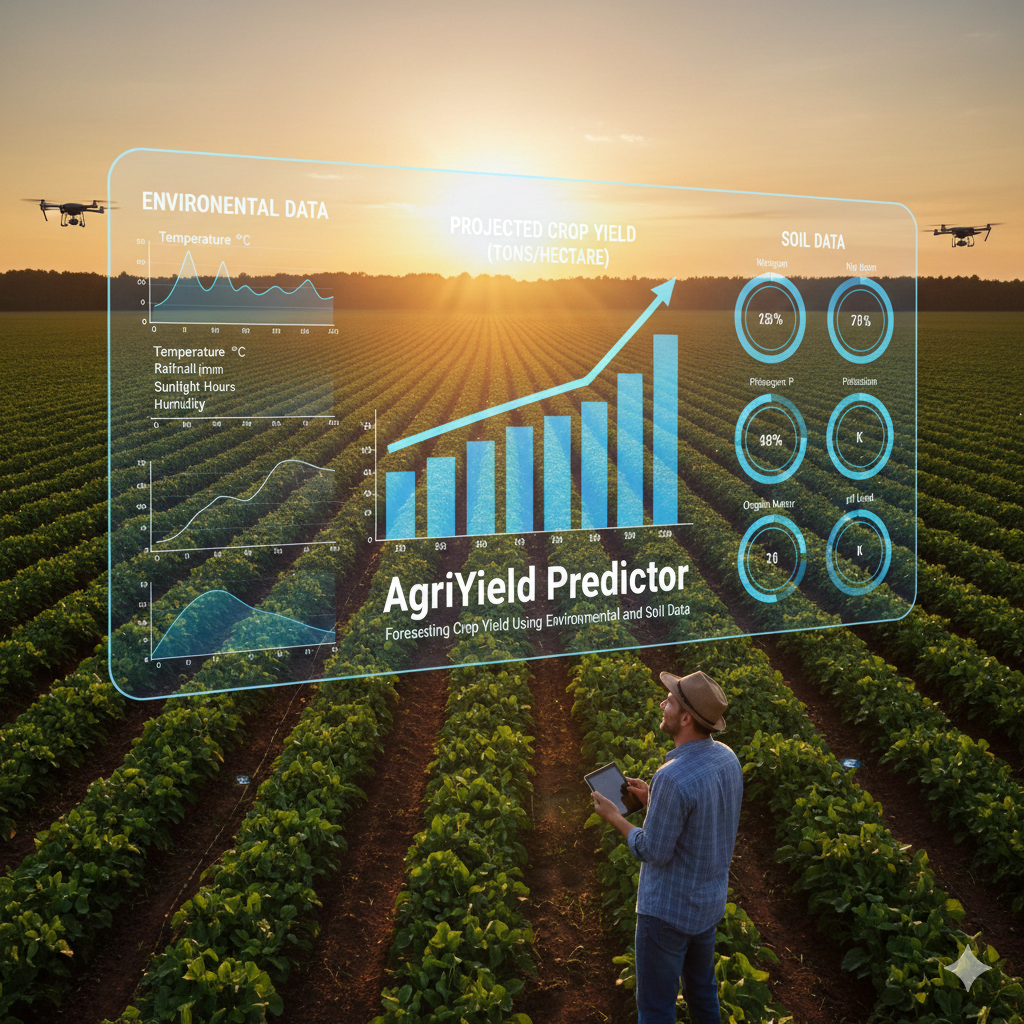

#**Milestone 1: Week 1 & 2 — Requirements & Dataset Preparation**

# **Project Overview & Scope**

**Project Objective**

Develop a machine learning model that can accurately predict crop yield (kg/hectare) for different crops grown in various regions, based on soil and environmental data.

**Project Scope**

This project will include:


| Task                       | Includes                                     | Tools Used          |
| -------------------------- | -------------------------------------------- | ------------------- |
| Data Collection & Cleaning | Integrating soil, crop, and climate datasets | Python (Pandas)     |
| EDA & Feature Engineering  | Trends, correlations, engineered features    | Matplotlib, Seaborn |
| Model Training             | Regression models                            | Sklearn, XGBoost    |
| Performance Evaluation     | RMSE, MAE, R² score                          | Sklearn metrics     |
| Deployment                 | Simple UI for farmers                        | Streamlit / Flask   |


####**Architectural diagram**

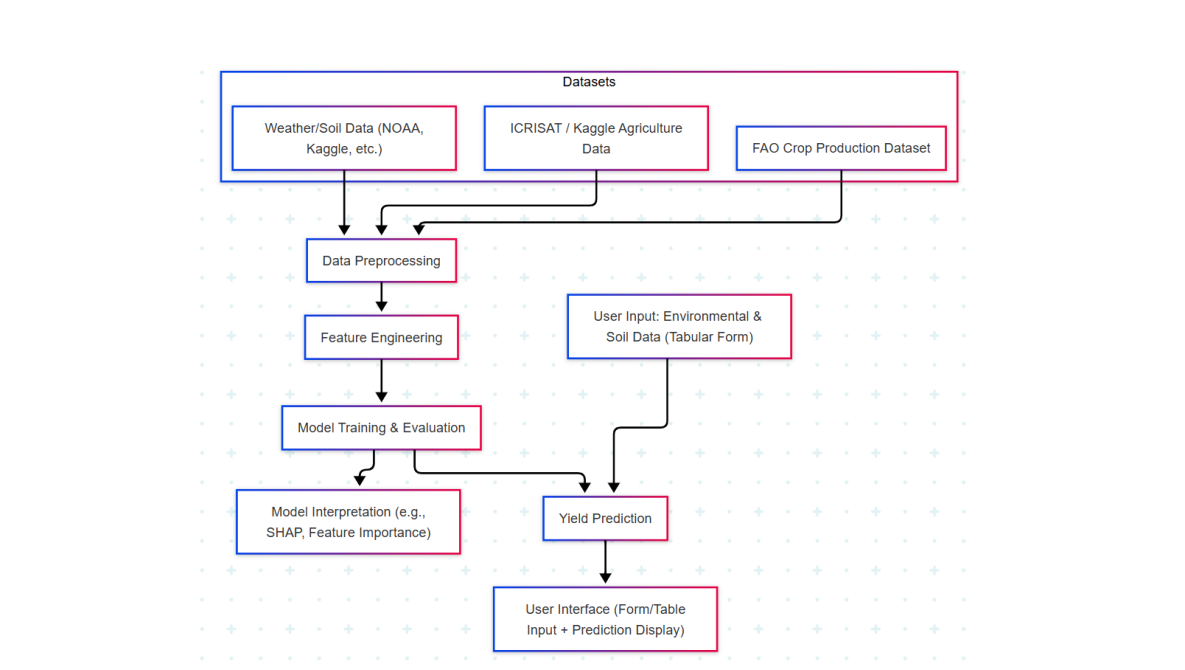

#**Import Required Libraries**


In [ ]:
import numpy as np            # For numerical operations
import pandas as pd           # For data loading & preprocessing
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For statistical visualizations

from sklearn.model_selection import train_test_split

#**Load Raw Datasets**

In [ ]:
# Load the first dataset (FAOSTAT data)
faostat_df = pd.read_csv("DF_1_FAOSTAT_data_en_11-19-2025.csv")

In [ ]:
# Load the second dataset (Crop Recommendation data)
crop_rec_df = pd.read_csv("DF_2_Crop_recommendation.csv")

In [ ]:
print("FAOSTAT DATASET:")
print(faostat_df.head())

FAOSTAT DATASET:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   
2  

In [ ]:
print("\nCROP RECOMMENDATION DATASET:")
print(crop_rec_df.head())


CROP RECOMMENDATION DATASET:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
print("\nFAOSTAT shape:", faostat_df.shape)
print("Crop Recommendation shape:", crop_rec_df.shape)


FAOSTAT shape: (5940, 15)
Crop Recommendation shape: (2200, 8)


#**Initial Data Inspection**

In [ ]:
def inspect_dataset(df, name):
    print(f"\n Dataset Inspection: {name}")
    print("-" * 60)

    # 1️ First few records
    print("\n First 5 rows:")
    display(df.head())

    # 2️ Dataset shape
    print("\n Shape (Rows, Columns):")
    print(df.shape)

    # 3️ Basic information
    print("\n Basic Info:")
    df.info()

    # 4️ Missing values
    print("\n Missing Values:")
    print(df.isnull().sum().sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

    # 5️ Duplicate rows
    print("\n Duplicate Rows:")
    print(f"Number of duplicate rows: {df.duplicated().sum()}")

    # 6 Duplicate columns
    print("\n Duplicate columns:")
    print(f"Number of duplicate columns: {df.duplicated().sum()}")

    # 7 Descriptive statistics for numerical columns
    print("\n  Descriptive Statistics:")
    print(df.describe().to_markdown(numalign="left", stralign="left"))

    # 8 Unique values for categorical columns (top 10)
    print("\n Unique Values (Top 10 for Object/Category Dtype Columns):")
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f"  - {col}:")
        print(df[col].value_counts().head(10).to_markdown(numalign="left", stralign="left"))
        print("\n")

# Now, let's call the function for each dataframe
inspect_dataset(faostat_df, "FAOSTAT Dataset")
inspect_dataset(crop_rec_df, "Crop Recommendation Dataset")


 Dataset Inspection: FAOSTAT Dataset
------------------------------------------------------------

 First 5 rows:


Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   
2  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000      t   
3  Anise, badian, coriander, cumin, caraway, fenn...       2001  2001     ha   
4  Anise, badian, coriander, cumin, caraway, fenn...       2001  2001  kg/ha   

      Value Flag Flag Description Note  
0  344434.0    A  Official figure  NaN  
1     484.0    A  Official figure  NaN  
2  166692.0    A  Official figure  NaN  
3  569271.0    A  Official figure  NaN  
4     430.3    A  Official figure  NaN


 Shape (Rows, Columns):
(5940, 15)

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null   float64
 7   Item              5940 non-null   object 
 8   Year Code         5940 non-null   int64  
 9   Year              5940 non-null   int64  
 10  Unit              5940 non-null   object 
 11  Value             5727 non-null   float64
 12  Flag              5940 non-null   object 
 13  Flag Description  5940 non-null   object 
 14  Note              115 non-null    object 
dtypes: float64(2), int64(4), object(9)
memo

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


 Shape (Rows, Columns):
(2200, 8)

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

 Missing Values:
|             | 0   |
|:------------|:----|
| N           | 0   |
| P           | 0   |
| K           | 0   |
| temperature | 0   |
| humidity    | 0   |
| ph          | 0   |
| rainfall    | 0   |
| label       | 0   |

 Duplicate Rows:
Number of duplicate rows: 0

 Duplicate columns:
Number of duplicate columns: 0

  Descriptive Statistics

#**Data Cleaning & Formatting**

**Remove duplicate rows**

In [ ]:
# Remove duplicate rows
faostat_df.drop_duplicates(inplace=True)
crop_rec_df.drop_duplicates(inplace=True)

**Check missing values**

In [ ]:
# Check missing values
print("Missing values in FAOSTAT dataset:")
print(faostat_df.isnull().sum())

print("\nMissing values in Crop Recommendation dataset:")
print(crop_rec_df.isnull().sum())

Missing values in FAOSTAT dataset:
Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                213
Flag                   0
Flag Description       0
Note                5825
dtype: int64

Missing values in Crop Recommendation dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# Show updated shapes
print("\nFAOSTAT shape:", faostat_df.shape)
print("Crop Recommendation shape:", crop_rec_df.shape)



FAOSTAT shape: (5940, 15)
Crop Recommendation shape: (2200, 8)


In [ ]:
# Preview updated data
print("\nFAOSTAT first 5 rows:")
display(faostat_df.head())


FAOSTAT first 5 rows:


Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   
2  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000      t   
3  Anise, badian, coriander, cumin, caraway, fenn...       2001  2001     ha   
4  Anise, badian, coriander, cumin, caraway, fenn...       2001  2001  kg/ha   

      Value Flag Flag Description Note  
0  344434.0    A  Official figure  NaN  
1     484.0    A  Official figure  NaN  
2  166692.0    A  Official figure  NaN  
3  569271.0    A  Official figure  NaN  
4     430.3    A  Official figure  NaN

In [ ]:
print("\nCrop Recommendation first 5 rows:")
display(crop_rec_df.head())


Crop Recommendation first 5 rows:


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

#**Merge Datasets**

In [ ]:
# Rename columns so they match for merging
faostat_df.rename(columns={'Item': 'crop'}, inplace=True)
crop_rec_df.rename(columns={'label': 'crop'}, inplace=True)

# Inspect unique crop names in both dataframes to identify discrepancies
print("Unique crops in FAOSTAT dataset (first 20):\n")
print(faostat_df['crop'].value_counts().head(20).to_markdown())

print("\nUnique crops in Crop Recommendation dataset:\n")
print(crop_rec_df['crop'].value_counts().to_markdown())

Unique crops in FAOSTAT dataset (first 20):

| crop                                                                      |   count |
|:--------------------------------------------------------------------------|--------:|
| Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw |      72 |
| Apples                                                                    |      72 |
| Apricots                                                                  |      72 |
| Areca nuts                                                                |      72 |
| Bananas                                                                   |      72 |
| Barley                                                                    |      72 |
| Beans, dry                                                                |      72 |
| Cabbages                                                                  |      72 |
| Cantaloupes and other melons                                             

In [ ]:
# Rename columns so they match for merging (moved from previous cell or ensuring execution)
faostat_df.rename(columns={'Item': 'crop'}, inplace=True)
crop_rec_df.rename(columns={'label': 'crop'}, inplace=True)

# Standardize 'crop' names in faostat_df to facilitate merging
faostat_df['crop'] = faostat_df['crop'].str.lower()
faostat_df['crop'] = faostat_df['crop'].replace({
    r', badian, coriander, cumin, caraway, fennel and juniper berries, raw': '',
    r's, raw': '',
    r', fresh': '',
    r's, in shell': '',
    r's, dry': '',
    r', green': '',
    r' and broccoli': '',
    r' (capsicum spp. and pimenta spp.)': '',
    r' (capsicum spp., pimenta spp.), raw': '',
    r', in shell': '',
    r', green': '',
    r' oil seeds': ' oilseed',
    r', dry': ''
}, regex=True)

# Trim any leading/trailing whitespace after cleaning
faostat_df['crop'] = faostat_df['crop'].str.strip()

# Replace specific terms that might still be problematic
faostat_df['crop'] = faostat_df['crop'].replace({
    'chick peas': 'chickpea',
    'areca nuts': 'areca nut',
    'beans': 'bean',
    'cabbages': 'cabbage',
    'cantaloupes and other melons': 'cantaloupe',
    'cashew nuts': 'cashew nut',
    'cassava': 'cassava',
    'castor oilseed': 'castor',
    'cauliflowers': 'cauliflower',
    'chillies and peppers': 'chilli pepper',
    'cherries': 'cherry',
    'coconuts': 'coconut',
    'coffee': 'coffee',
    'apples': 'apple',
    'bananas': 'banana',
    'barley': 'barley',
    'apricots': 'apricot'
})

print("Unique crops in FAOSTAT dataset after standardization (first 20):\n")
print(faostat_df['crop'].value_counts().head(20).to_markdown())

# Re-attempt merge after standardization
merged_df = pd.merge(faostat_df, crop_rec_df, on="crop", how="inner")

print("\nMerge Attempted!")
print("Merged dataset shape:", merged_df.shape)

Unique crops in FAOSTAT dataset after standardization (first 20):

| crop                                                   |   count |
|:-------------------------------------------------------|--------:|
| anise                                                  |      72 |
| apple                                                  |      72 |
| apricot                                                |      72 |
| areca nut                                              |      72 |
| banana                                                 |      72 |
| barley                                                 |      72 |
| bean                                                   |      72 |
| cabbage                                                |      72 |
| cantaloupe                                             |      72 |
| cashew nut                                             |      72 |
| cassava                                                |      72 |
| castor                            

In [ ]:
# Show first 10 rows of merged data
display(merged_df.head())

Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)   crop  Year Code  Year  ...  \
0          5312  Area harvested           1341.0  apple       2000  2000  ...   
1          5312  Area harvested           1341.0  apple       2000  2000  ...   
2          5312  Area harvested           1341.0  apple       2000  2000  ...   
3          5312  Area harvested           1341.0  apple       2000  2000  ...   
4          5312  Area harvested           1341.0  apple       2000  2000  ...   

  Flag  Flag Description Note   N    P    K  temperature   humidity        ph  \
0    A   Official figure  NaN  24  128  196    22.750888  90.694892  5.521467   
1    A   Official figure  NaN   7  144  197    23.849401  94.348150  6.133221   
2    A   Official figure  NaN  14  128  205    22.608010  94.589006  6.226290   
3    A   Official figure  NaN   8  120  201    21.186674  91.134357  6.321152   
4    A   Official figure  NaN  20  129  201    23.410447  91.699133  5.587906   

     rainfall  
0  110.431786  
1  114.051249  
2  116.039659  
3  122.233323  
4  116.077793  

[5 rows x 22 columns]

In [ ]:
merged_df


Empty DataFrame
Columns: [Domain Code, Domain, Area Code (M49), Area, Element Code, Element, Item Code (CPC), crop, Year Code, Year, Unit, Value, Flag, Flag Description, Note, N, P, K, temperature, humidity, ph, rainfall]
Index: []

[0 rows x 22 columns]

In [ ]:
print("Merged Dataset Columns:")
print(list(merged_df.columns))


Merged Dataset Columns:
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'crop', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


# **Missing Value Analysis & Imputation**

In [ ]:
# Fill missing values in FAOSTAT dataset
faostat_df.fillna({
    col: faostat_df[col].mean() if faostat_df[col].dtype != 'object' else "Unknown"
    for col in faostat_df.columns
}, inplace=True)



In [ ]:
# Fill missing values in Crop Recommendation dataset
crop_rec_df.fillna({
    col: crop_rec_df[col].mean() if crop_rec_df[col].dtype != 'object' else "Unknown"
    for col in crop_rec_df.columns
}, inplace=True)

print(" Missing values handled successfully!")

 Missing values handled successfully!


In [ ]:
#Check again after fixing
print("Remaining missing values in FAOSTAT:")
print(faostat_df.isnull().sum())

print("\nRemaining missing values in Crop Recommendation:")
print(crop_rec_df.isnull().sum())


Remaining missing values in FAOSTAT:
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
crop                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64

Remaining missing values in Crop Recommendation:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64


# **Train-Test Split**

In [ ]:
# Train-Test Split for Machine Learning

from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# -------- FAOSTAT: Predict "Yield_kg_ha" column --------

# Define faostat_df_cleaned: Filter faostat_df for yield data and prepare columns
# Assumption: 'faostat_df' contains 'Yield' element with 'kg/ha' unit, and 'Value' is the yield.
faostat_df_cleaned = faostat_df[
    (faostat_df['Element'] == 'Yield') & (faostat_df['Unit'] == 'kg/ha')
].copy()

# Rename 'Value' to 'Yield_kg_ha' for consistency and 'Area' to 'Country' for one-hot encoding
faostat_df_cleaned.rename(columns={'Value': 'Yield_kg_ha', 'Area': 'Country'}, inplace=True)

# X = all columns except 'Yield_kg_ha' from faostat_df_cleaned
# Drop additional irrelevant columns for machine learning features.
X_faostat = faostat_df_cleaned.drop(columns=[
    'Yield_kg_ha', 'Domain Code', 'Domain', 'Element Code', 'Element',
    'Item Code (CPC)', 'Unit', 'Flag', 'Flag Description', 'Note', 'Year Code'
], errors='ignore').copy()

# y = target column we want to predict
y_faostat = faostat_df_cleaned['Yield_kg_ha'].copy()

# Apply one-hot encoding to categorical features in X_faostat
X_faostat = pd.get_dummies(X_faostat, columns=['Country', 'crop'], drop_first=True)

# Split into Train (80%) and Test (20%)
X_train_faostat, X_test_faostat, y_train_faostat, y_test_faostat = train_test_split(
    X_faostat, y_faostat, test_size=0.2, random_state=42
)

print(" FAOSTAT Train–Test Split Done")
print("X_train_faostat shape:", X_train_faostat.shape)
print("X_test_faostat shape:", X_test_faostat.shape)
print("y_train_faostat shape:", y_train_faostat.shape)
print("y_test_faostat shape:", y_test_faostat.shape)

 FAOSTAT Train–Test Split Done
X_train_faostat shape: (1514, 82)
X_test_faostat shape: (379, 82)
y_train_faostat shape: (1514,)
y_test_faostat shape: (379,)


In [ ]:
from sklearn.model_selection import train_test_split

# Crop Recommendation: Predict "crop" --------

# X = all columns except 'crop'
X_crop = crop_rec_df.drop('crop', axis=1)

# y = target crop label
y_crop = crop_rec_df['crop']

# Split into Train (80%) and Test (20%)
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(
    X_crop, y_crop, test_size=0.2, random_state=42
)

print(" Crop Recommendation Train–Test Split Done")
print("X_train_crop:", X_train_crop.shape)
print("X_test_crop :", X_test_crop.shape)
print("y_train_crop:", y_train_crop.shape)
print("y_test_crop :", y_test_crop.shape)

 Crop Recommendation Train–Test Split Done
X_train_crop: (1760, 7)
X_test_crop : (440, 7)
y_train_crop: (1760,)
y_test_crop : (440,)


In [ ]:
from IPython.display import display

# Explore unique values in y_train_crop
print("Unique crop labels in y_train_crop:")
display(y_train_crop.unique())

print("\nCount of each unique crop label in y_train_crop:")
display(y_train_crop.value_counts())

Unique crop labels in y_train_crop:


array(['orange', 'blackgram', 'lentil', 'banana', 'mango', 'maize',
       'apple', 'pomegranate', 'cotton', 'mungbean', 'pigeonpeas',
       'chickpea', 'coffee', 'jute', 'papaya', 'grapes', 'rice',
       'kidneybeans', 'muskmelon', 'mothbeans', 'watermelon', 'coconut'],
      dtype=object)


Count of each unique crop label in y_train_crop:


crop
lentil         89
orange         86
grapes         86
coffee         83
cotton         83
muskmelon      83
rice           81
watermelon     81
mungbean       81
mango          81
blackgram      80
kidneybeans    80
maize          79
banana         79
pomegranate    77
jute           77
pigeonpeas     77
apple          77
papaya         77
mothbeans      76
chickpea       74
coconut        73
Name: count, dtype: int64

**Merge Both → Then Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Input features (all columns except 'Value')
X = merged_df.drop('Value', axis=1)

# Target column
y = merged_df['Value']

# Splitting into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(" Train-Test Split Completed!")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

 Train-Test Split Completed!
Training set size: (40320, 21)
Testing set size: (10080, 21)


###**Train Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_faostat, y_train_faostat)

# Make predictions
y_pred = model.predict(X_test_faostat)

# Model Evaluation
mae = mean_absolute_error(y_test_faostat, y_pred)
r2 = r2_score(y_test_faostat, y_pred)

print(" Model Trained Successfully!")
print("MAE (Mean Absolute Error):", mae)
print("R2 Score (Accuracy):", r2)

 Model Trained Successfully!
MAE (Mean Absolute Error): 306.255316622692
R2 Score (Accuracy): 0.9939892821099797


# **Save Cleaned Dataset for EDA**

#####**Save Cleaned Dataset**

In [ ]:
faostat_df
crop_rec_df


N   P   K  temperature   humidity        ph    rainfall    crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [ ]:
# Save cleaned FAOSTAT dataset
faostat_df.to_csv("cleaned_faostat_data.csv", index=False)

# Save cleaned Crop Recommendation dataset
crop_rec_df.to_csv("cleaned_crop_rec_data.csv", index=False)

print(" Cleaned datasets saved successfully!")


 Cleaned datasets saved successfully!


In [ ]:
# show saved files
import os
print(os.listdir())


['.config', 'DF_1_FAOSTAT_data_en_11-19-2025.csv', 'cleaned_crop_rec_data.csv', 'DF_2_Crop_recommendation.csv', 'cleaned_faostat_data.csv', 'sample_data']


#####**EDA (Exploratory Data Analysis)**

**Step 1: Dataset Overview**

In [ ]:
# Dataset overview for FAOSTAT
print(" FAOSTAT Dataset Info:")
print(faostat_df.info())

print(" FAOSTAT Describe:")
display(faostat_df.describe())

# Dataset overview for Crop Recommendation
print(" Crop Recommendation Dataset Info:")
print(crop_rec_df.info())

print(" Crop Recommendation Describe:")
display(crop_rec_df.describe())



 FAOSTAT Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null   float64
 7   crop              5940 non-null   object 
 8   Year Code         5940 non-null   int64  
 9   Year              5940 non-null   int64  
 10  Unit              5940 non-null   object 
 11  Value             5940 non-null   float64
 12  Flag              5940 non-null   object 
 13  Flag Description  5940 non-null   object 
 14  Note              5940 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 696.2+ KB
None
 F

Area Code (M49)  Element Code  Item Code (CPC)    Year Code  \
count           5940.0   5940.000000      5940.000000  5940.000000   
mean             356.0   5411.868687      1328.049098  2011.442424   
std                0.0     81.720489       445.253861     6.905385   
min              356.0   5312.000000       111.000000  2000.000000   
25%              356.0   5312.000000      1242.000000  2005.000000   
50%              356.0   5412.000000      1345.000000  2011.000000   
75%              356.0   5510.000000      1620.000000  2017.000000   
max              356.0   5510.000000      1970.000000  2023.000000   

              Year         Value  
count  5940.000000  5.940000e+03  
mean   2011.442424  4.757827e+06  
std       6.905385  2.506259e+07  
min    2000.000000  1.569000e+02  
25%    2005.000000  8.608000e+03  
50%    2011.000000  2.242500e+05  
75%    2017.000000  1.859887e+06  
max    2023.000000  4.905334e+08

 Crop Recommendation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
 Crop Recommendation Describe:


N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

**Step 2: Check Crop Distribution (Value Counts)**

In [ ]:
# Crop count in each dataset
print(" Top Crops in FAOSTAT:")
print(faostat_df['crop'].value_counts().head())

print(" Crop Labels in Recommendation Dataset:")
print(crop_rec_df['crop'].value_counts().head())

 Top Crops in FAOSTAT:
crop
anise        72
apple        72
apricot      72
areca nut    72
banana       72
Name: count, dtype: int64
 Crop Labels in Recommendation Dataset:
crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
Name: count, dtype: int64


**Step 3: Crop Production Analysis (Bar Chart)**

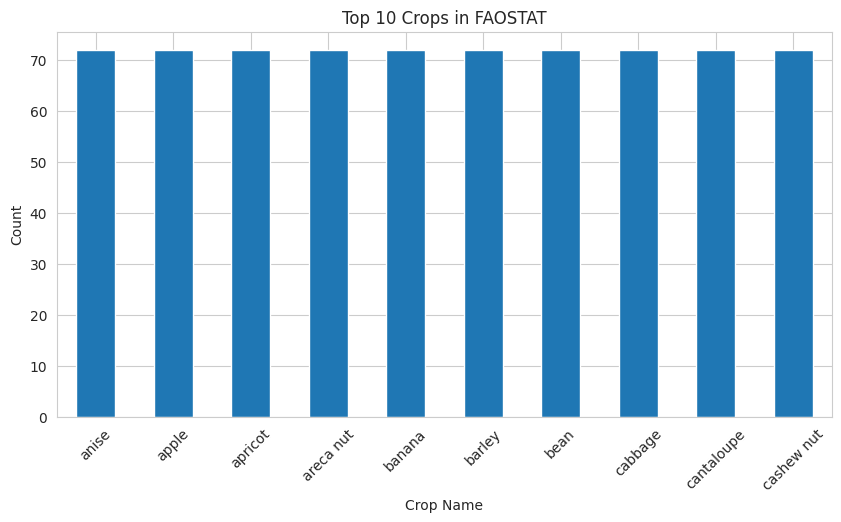

In [ ]:
import matplotlib.pyplot as plt

# Count crops and show top 10
top_crops = faostat_df['crop'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_crops.plot(kind='bar')
plt.title("Top 10 Crops in FAOSTAT")
plt.xlabel("Crop Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Step 4: Production Over Years (Line Chart)**

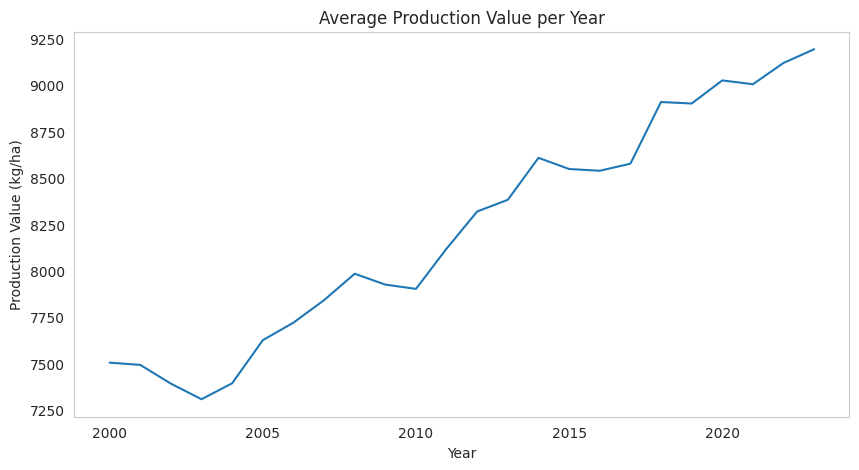

In [ ]:
# Group by year and calculate average production value
yearly_production = faostat_df_cleaned.groupby('Year')['Yield_kg_ha'].mean()

plt.figure(figsize=(10,5))
yearly_production.plot(kind='line')
plt.title("Average Production Value per Year")
plt.xlabel("Year")
plt.ylabel("Production Value (kg/ha)")
plt.grid()
plt.show()

**Step 5: Correlation Heatmap (Crop Recommendation Dataset)**

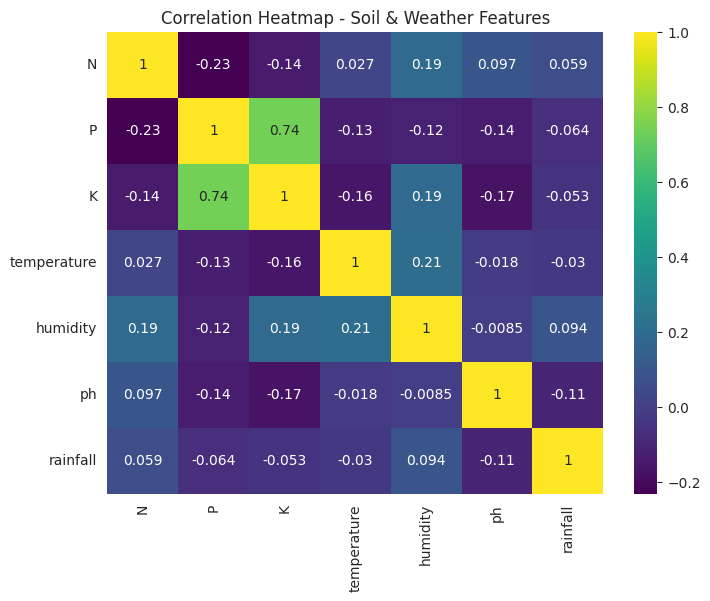

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
# Exclude non-numeric columns (like 'crop') when calculating correlation
sns.heatmap(crop_rec_df.drop(columns=['crop']).corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap - Soil & Weather Features")
plt.show()

**Step 6: Boxplot to Detect Outliers**

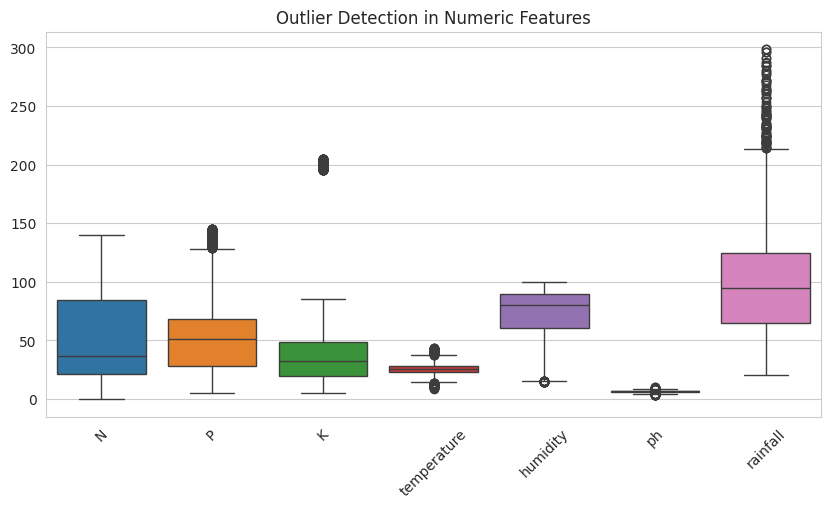

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=crop_rec_df.select_dtypes(include=['float64','int64']))
plt.title("Outlier Detection in Numeric Features")
plt.xticks(rotation=45)
plt.show()


# **Milestone 2: Week 3 & 4 - EDA & Feature Engineering**

### **Performing Exploratory Data Analysis (EDA)**

--- Performing Exploratory Data Analysis (EDA) on df_final_agri_encoded ---


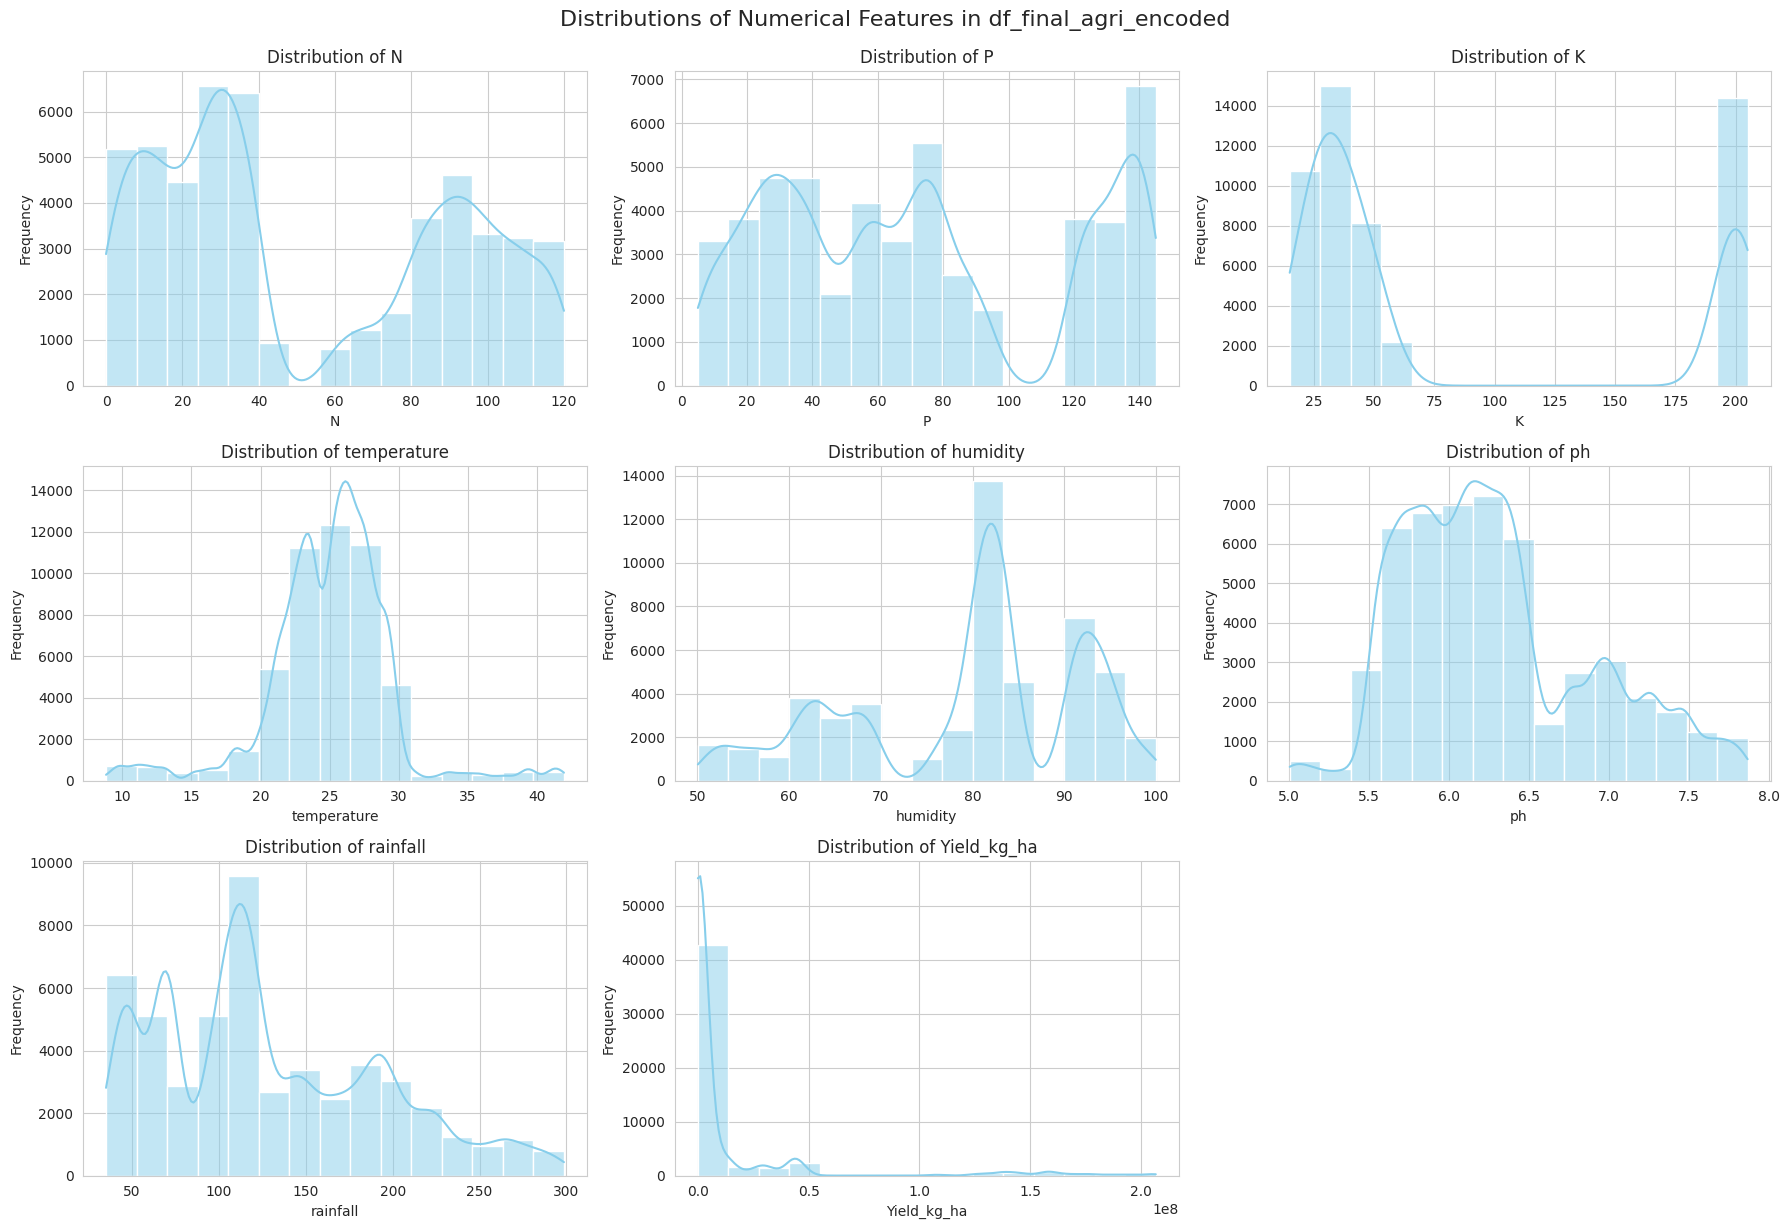

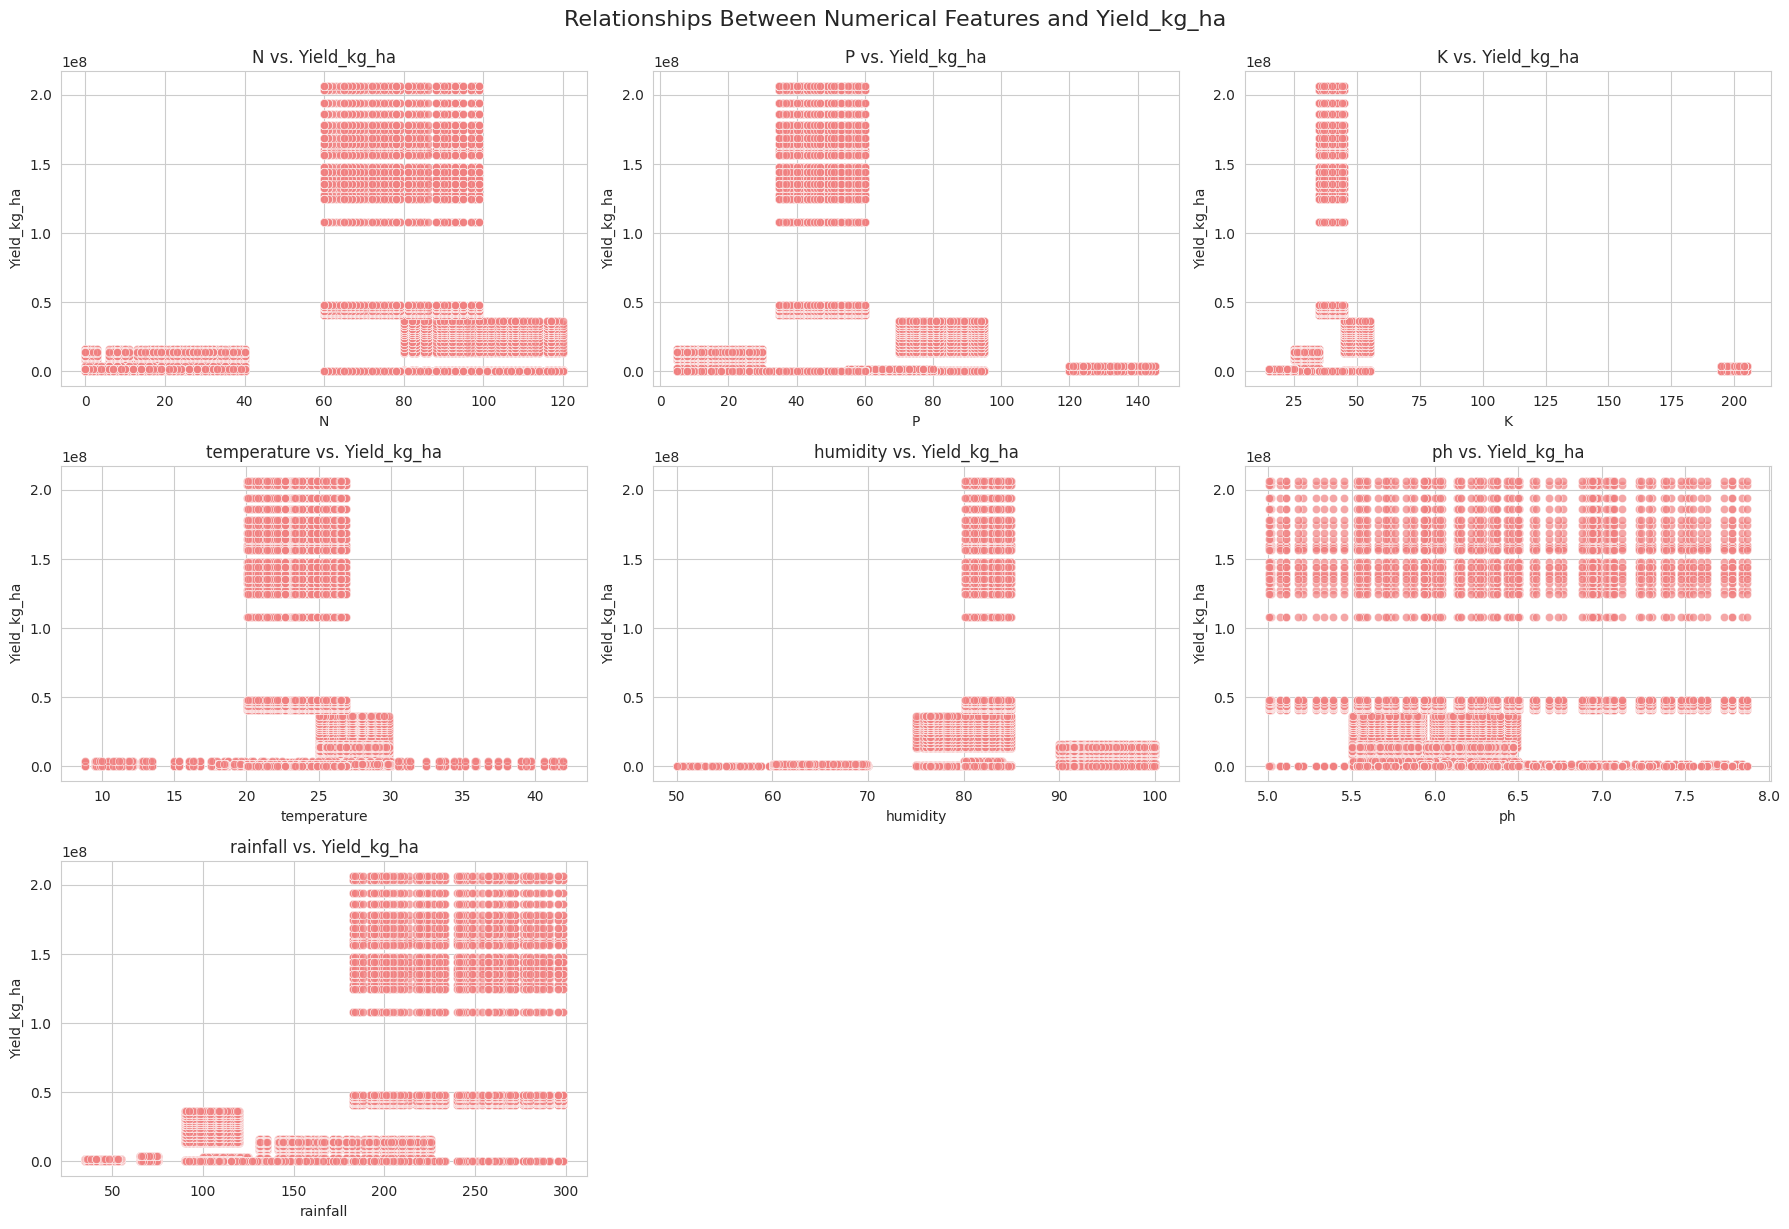


Correlation Matrix of Numerical Features (df_final_agri_encoded):


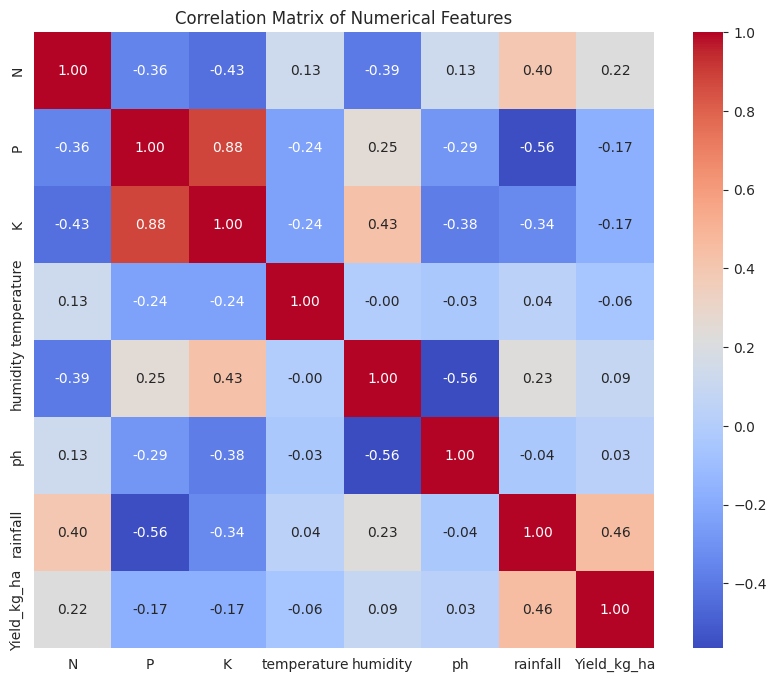


EDA Complete. Visualizations and Correlation Matrix generated.


In [ ]:
print('--- Performing Exploratory Data Analysis (EDA) on df_final_agri_encoded ---')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df_final_agri' is defined from previous steps. If not, this will still error.
# Apply one-hot encoding to 'Country' and 'crop' columns in df_final_agri
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

# Set style for plots
sns.set_style("whitegrid")

# Define numerical features again for clarity, including the target variable
# Exclude Year for correlation analysis if it's treated as a categorical or just for grouping
numerical_features_for_eda = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Yield_kg_ha']

# Plotting distributions of numerical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features_for_eda):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_final_agri_encoded[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Distributions of Numerical Features in df_final_agri_encoded', y=1.02, fontsize=16)
plt.show()

# Plotting relationships between numerical features and 'Yield_kg_ha'
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features_for_eda[:-1]): # Exclude 'Yield_kg_ha' from independent variables
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df_final_agri_encoded[col], y=df_final_agri_encoded['Yield_kg_ha'], color='lightcoral', alpha=0.7)
    plt.title(f'{col} vs. Yield_kg_ha')
    plt.xlabel(col)
    plt.ylabel('Yield_kg_ha')
plt.tight_layout()
plt.suptitle('Relationships Between Numerical Features and Yield_kg_ha', y=1.02, fontsize=16)
plt.show()

print('\nCorrelation Matrix of Numerical Features (df_final_agri_encoded):')
# Calculate and display the correlation matrix for numerical features only
corr_matrix_final = df_final_agri_encoded[numerical_features_for_eda].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_final, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print('\nEDA Complete. Visualizations and Correlation Matrix generated.')

Text(0.5, 0.98, 'FAOSTAT - Overview')

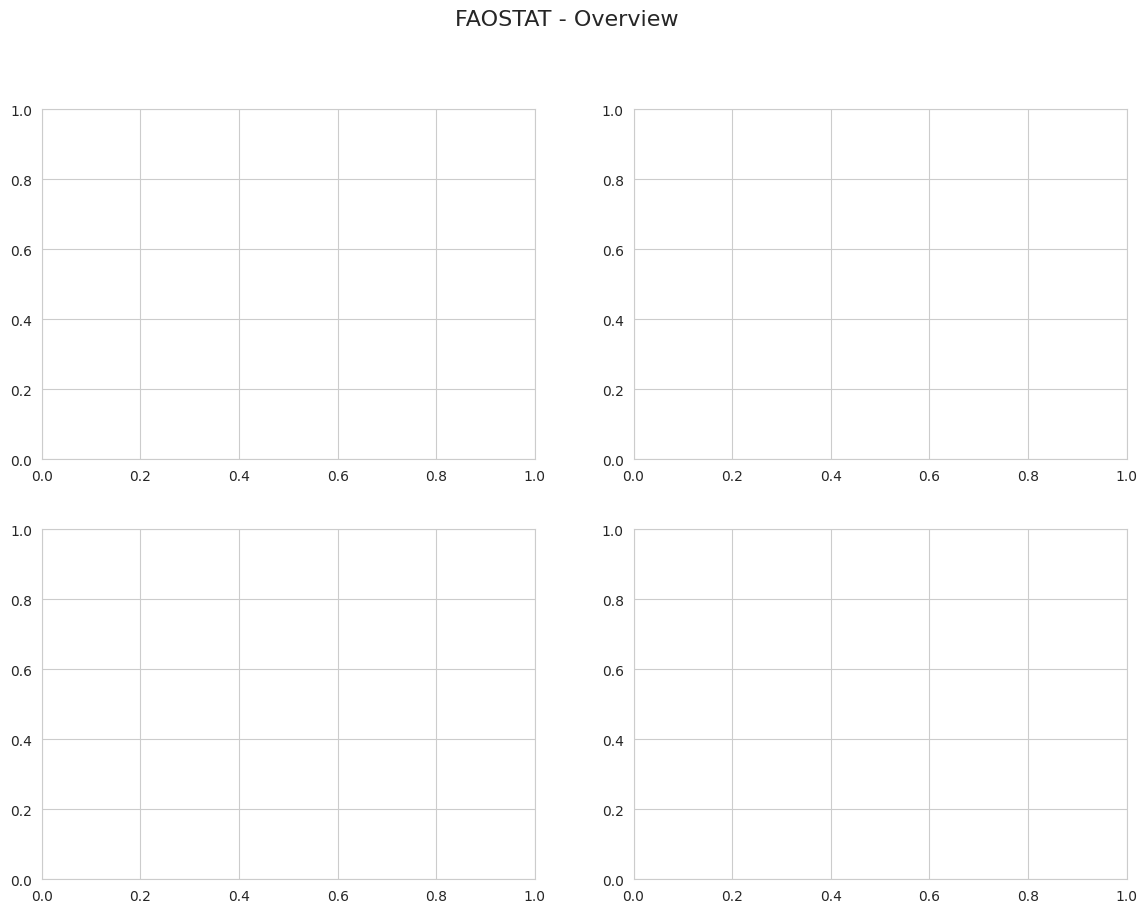

In [ ]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("FAOSTAT - Overview", fontsize=16)

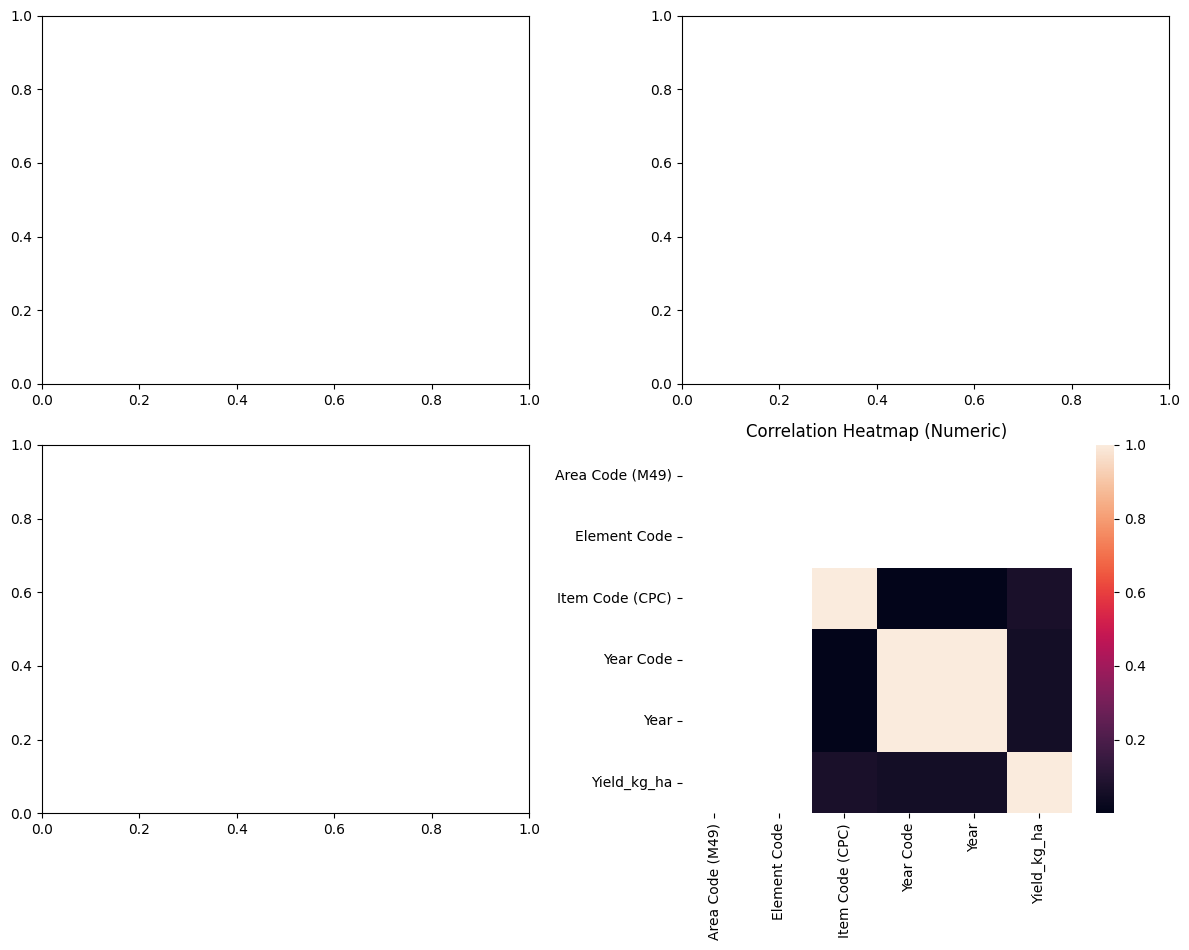

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 4) Correlation heatmap (numeric columns)
# Initialize a figure and a 2x2 grid of subplots (assuming this is part of a larger plot setup)
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # Added this line

numeric_df = faostat_df_cleaned.select_dtypes(include=['int64', 'float64'])
if numeric_df.shape[1] > 1:
    sns.heatmap(numeric_df.corr(), ax=axes[1, 1], annot=False)
    axes[1, 1].set_title("Correlation Heatmap (Numeric)")
else:
    axes[1, 1].text(0.5, 0.5, "Not enough numeric columns", ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
plt.show()

## Encoding categorical feature

In [ ]:
print("--- Encoding categorical features in df_final_agri ---")

# Apply one-hot encoding to 'Country' and 'crop' columns in df_final_agri
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

print("\nShape of df_final_agri after one-hot encoding:" , df_final_agri_encoded.shape)
print("\nFirst 5 rows of df_final_agri_encoded:")
display(df_final_agri_encoded.head())
print("\nData types of df_final_agri_encoded after encoding:")
print(df_final_agri_encoded.info())

--- Encoding categorical features in df_final_agri ---

Shape of df_final_agri after one-hot encoding: (50400, 15)

First 5 rows of df_final_agri_encoded:


Year  Yield_kg_ha   N    P    K  temperature   humidity        ph  \
0  2000     230000.0  24  128  196    22.750888  90.694892  5.521467   
1  2000     230000.0   7  144  197    23.849401  94.348150  6.133221   
2  2000     230000.0  14  128  205    22.608010  94.589006  6.226290   
3  2000     230000.0   8  120  201    21.186674  91.134357  6.321152   
4  2000     230000.0  20  129  201    23.410447  91.699133  5.587906   

     rainfall  crop_banana  crop_coconut  crop_coffee  crop_grapes  \
0  110.431786        False         False        False        False   
1  114.051249        False         False        False        False   
2  116.039659        False         False        False        False   
3  122.233323        False         False        False        False   
4  116.077793        False         False        False        False   

   crop_lentil  crop_rice  
0        False      False  
1        False      False  
2        False      False  
3        False      False  
4        False      False


Data types of df_final_agri_encoded after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          50400 non-null  int64  
 1   Yield_kg_ha   50400 non-null  float64
 2   N             50400 non-null  int64  
 3   P             50400 non-null  int64  
 4   K             50400 non-null  int64  
 5   temperature   50400 non-null  float64
 6   humidity      50400 non-null  float64
 7   ph            50400 non-null  float64
 8   rainfall      50400 non-null  float64
 9   crop_banana   50400 non-null  bool   
 10  crop_coconut  50400 non-null  bool   
 11  crop_coffee   50400 non-null  bool   
 12  crop_grapes   50400 non-null  bool   
 13  crop_lentil   50400 non-null  bool   
 14  crop_rice     50400 non-null  bool   
dtypes: bool(6), float64(5), int64(4)
memory usage: 3.7 MB
None


In [ ]:
print("--- Applying feature scaling (Standardization) to numerical features ---")

from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
# Exclude 'Year' and 'Yield_kg_ha' (our target variable), and the newly created dummy variables (which are boolean/int)
numerical_cols_to_scale = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
df_final_agri_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_final_agri_encoded[numerical_cols_to_scale])

print("\nFirst 5 rows of df_final_agri_encoded after scaling:")
display(df_final_agri_encoded.head())
print("\nDescriptive statistics of scaled numerical features:")
print(df_final_agri_encoded[numerical_cols_to_scale].describe().to_markdown(numalign="left", stralign="left"))

--- Applying feature scaling (Standardization) to numerical features ---

First 5 rows of df_final_agri_encoded after scaling:


Year  Yield_kg_ha         N         P         K  temperature  humidity  \
0  2000     230000.0 -0.736699  1.251601  1.516253    -0.509755  0.898625   
1  2000     230000.0 -1.179350  1.615108  1.529484    -0.260876  1.187665   
2  2000     230000.0 -0.997082  1.251601  1.635339    -0.542126  1.206721   
3  2000     230000.0 -1.153312  1.069847  1.582412    -0.864144  0.933394   
4  2000     230000.0 -0.840852  1.274320  1.582412    -0.360326  0.978079   

         ph  rainfall  crop_banana  crop_coconut  crop_coffee  crop_grapes  \
0 -1.309720 -0.288901        False         False        False        False   
1 -0.272917 -0.232372        False         False        False        False   
2 -0.115183 -0.201317        False         False        False        False   
3  0.045590 -0.104584        False         False        False        False   
4 -1.197119 -0.200721        False         False        False        False   

   crop_lentil  crop_rice  
0        False      False  
1        False      False  
2        False      False  
3        False      False  
4        False      False


Descriptive statistics of scaled numerical features:
|       | N           | P          | K           | temperature   | humidity    | ph          | rainfall     |
|:------|:------------|:-----------|:------------|:--------------|:------------|:------------|:-------------|
| count | 50400       | 50400      | 50400       | 50400         | 50400       | 50400       | 50400        |
| mean  | -5.8648e-17 | 6.5415e-17 | -9.4739e-17 | 5.75201e-17   | 3.38354e-17 | 1.07371e-15 | -3.42865e-16 |
| std   | 1.00001     | 1.00001    | 1.00001     | 1.00001       | 1.00001     | 1.00001     | 1.00001      |
| min   | -1.36162    | -1.54286   | -0.878706   | -3.66465      | -2.31749    | -2.18451    | -1.46645     |
| 25%   | -0.86689    | -0.866965  | -0.693461   | -0.497568     | -0.884499   | -0.76644    | -0.894969    |
| 50%   | -0.424239   | -0.111551  | -0.547911   | 0.0948312     | 0.183447    | -0.171679   | -0.200066    |
| 75%   | 1.00787     | 1.11529    | 1.51625     | 0.544452      |

# **Target Variable Distribution (Crop Yield)**

**Distribution Plot (Histogram + KDE)**

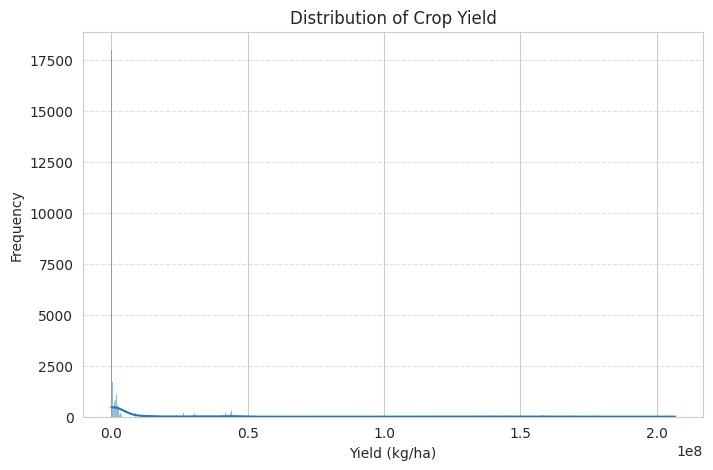

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- Define df_final_agri from merged_df (assuming merged_df is available) ---
# Select relevant columns for df_final_agri and rename for consistency
df_final_agri = merged_df[[
    'Area', 'crop', 'Year', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]].copy()

df_final_agri.rename(columns={'Area': 'Country', 'Value': 'Yield_kg_ha'}, inplace=True)

# --- Create df_final_agri_encoded (from df_final_agri) ---
# Apply one-hot encoding to 'Country' and 'crop' columns in df_final_agri
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

# Identify numerical columns for scaling
numerical_cols_to_scale = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
df_final_agri_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_final_agri_encoded[numerical_cols_to_scale])
# --- End of creating df_final_agri_encoded ---

plt.figure(figsize=(8,5))
sns.histplot(df_final_agri_encoded['Yield_kg_ha'], kde=True)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield (kg/ha)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Boxplot for Outlier Detection**

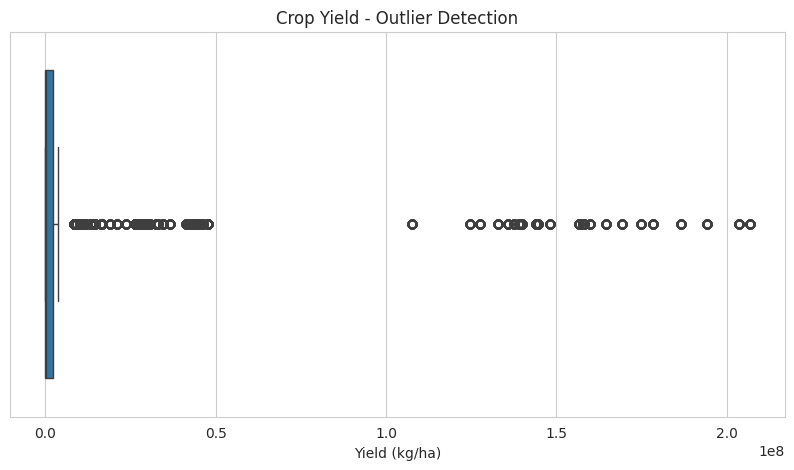

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_final_agri_encoded['Yield_kg_ha'])
plt.title("Crop Yield - Outlier Detection")
plt.xlabel("Yield (kg/ha)")
plt.show()


**Statistical Summary**

In [ ]:
summary_stats = df_final_agri_encoded['Yield_kg_ha'].describe()
print(" Crop Yield Statistical Summary:")
print(summary_stats)

 Crop Yield Statistical Summary:
count    5.040000e+04
mean     1.180671e+07
std      3.443681e+07
min      5.908000e+02
25%      2.116060e+04
50%      3.645860e+05
75%      2.134750e+06
max      2.067270e+08
Name: Yield_kg_ha, dtype: float64


**Check Skewness**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Create df_final_agri_encoded (assuming df_final_agri is defined) ---
# One-hot encode categorical columns
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

# Identify numerical columns for scaling
numerical_cols_to_scale = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Initialize StandardScaler and apply to numerical columns
scaler = StandardScaler()
df_final_agri_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_final_agri_encoded[numerical_cols_to_scale])
# --- End of creating df_final_agri_encoded ---

skew_value = df_final_agri_encoded['Yield_kg_ha'].skew()
print(f" Skewness of Crop Yield: {skew_value:.2f}")

 Skewness of Crop Yield: 3.85


# **Feature-Level Analysis**

**Load both datasets**

In [ ]:
# Import Required Libraries
import pandas as pd

# Load datasets
faostat_df = pd.read_csv("DF_1_FAOSTAT_data_en_11-19-2025.csv")
crop_df = pd.read_csv("DF_2_Crop_recommendation.csv")

# Display first rows
print("FAOSTAT Dataset Preview:")
display(faostat_df.head())

print("\nCrop Recommendation Dataset Preview:")
display(crop_df.head())


FAOSTAT Dataset Preview:


Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   
2  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000      t   
3  Anise, badian, coriander, cumin, caraway, fenn...       2001  2001     ha   
4  Anise, badian, coriander, cumin, caraway, fenn...       2001  2001  kg/ha   

      Value Flag Flag Description Note  
0  344434.0    A  Official figure  NaN  
1     484.0    A  Official figure  NaN  
2  166692.0    A  Official figure  NaN  
3  569271.0    A  Official figure  NaN  
4     430.3    A  Official figure  NaN


Crop Recommendation Dataset Preview:


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

**Check Data Types & Basic Info**

In [ ]:
print("FAOSTAT Data Info:")
faostat_df.info()

print("\nCrop Recommendation Data Info:")
crop_df.info()


FAOSTAT Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null   float64
 7   Item              5940 non-null   object 
 8   Year Code         5940 non-null   int64  
 9   Year              5940 non-null   int64  
 10  Unit              5940 non-null   object 
 11  Value             5727 non-null   float64
 12  Flag              5940 non-null   object 
 13  Flag Description  5940 non-null   object 
 14  Note              115 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 696.2+ KB

Crop Recom

**Missing Values Check**

In [ ]:
print("Missing Values in FAOSTAT:")
print(faostat_df.isnull().sum())

print("\nMissing Values in Crop Dataset:")
print(crop_df.isnull().sum())


Missing Values in FAOSTAT:
Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                213
Flag                   0
Flag Description       0
Note                5825
dtype: int64

Missing Values in Crop Dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


**Unique Value Count (Categorical Features)**

In [ ]:
# Show unique categories for categorical columns
cat_cols_fao = faostat_df.select_dtypes(include=['object']).columns
cat_cols_crop = crop_df.select_dtypes(include=['object']).columns

print("Unique Values in FAOSTAT (Categorical):")
for col in cat_cols_fao:
    print(col, ":", faostat_df[col].nunique())

print("\nUnique Values in Crop Dataset (Categorical):")
for col in cat_cols_crop:
    print(col, ":", crop_df[col].nunique())


Unique Values in FAOSTAT (Categorical):
Domain Code : 1
Domain : 1
Area : 1
Element : 3
Item : 85
Unit : 3
Flag : 5
Flag Description : 5
Note : 1

Unique Values in Crop Dataset (Categorical):
label : 22


**Statistical Summary (Numerical Features)**

In [ ]:
print("FAOSTAT - Numerical Summary:")
display(faostat_df.describe())

print("\nCrop Dataset - Numerical Summary:")
display(crop_df.describe())


FAOSTAT - Numerical Summary:


Area Code (M49)  Element Code  Item Code (CPC)    Year Code  \
count           5940.0   5940.000000      5940.000000  5940.000000   
mean             356.0   5411.868687      1328.049098  2011.442424   
std                0.0     81.720489       445.253861     6.905385   
min              356.0   5312.000000       111.000000  2000.000000   
25%              356.0   5312.000000      1242.000000  2005.000000   
50%              356.0   5412.000000      1345.000000  2011.000000   
75%              356.0   5510.000000      1620.000000  2017.000000   
max              356.0   5510.000000      1970.000000  2023.000000   

              Year         Value  
count  5940.000000  5.727000e+03  
mean   2011.442424  4.757827e+06  
std       6.905385  2.552448e+07  
min    2000.000000  1.569000e+02  
25%    2005.000000  8.002650e+03  
50%    2011.000000  1.730000e+05  
75%    2017.000000  1.469500e+06  
max    2023.000000  4.905334e+08


Crop Dataset - Numerical Summary:


N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

**Correlation with Target Variable**

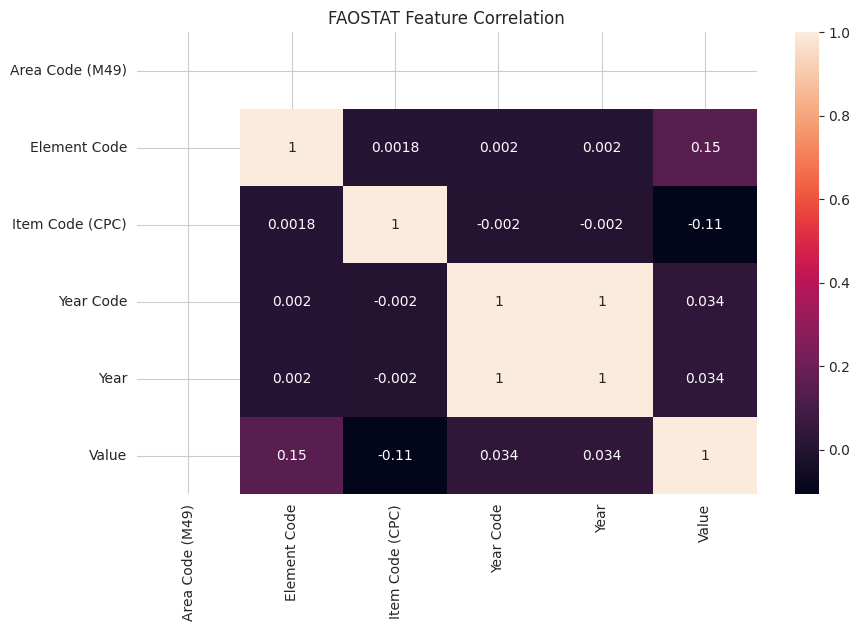

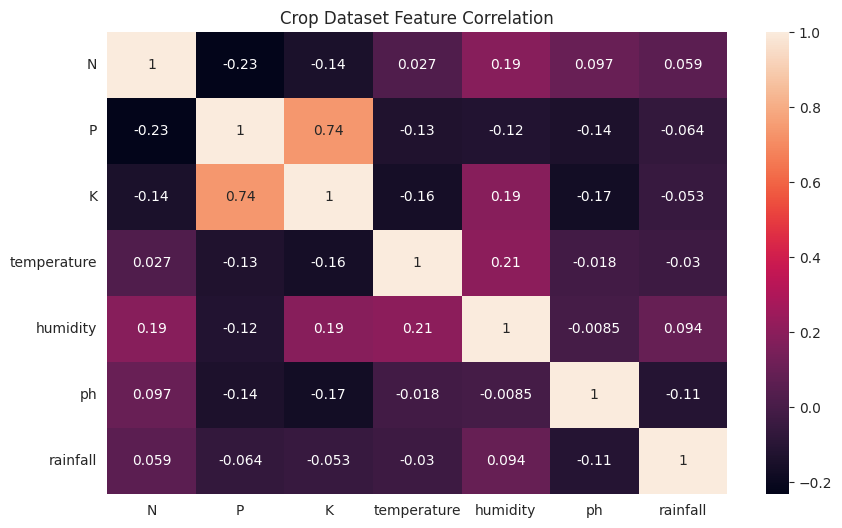

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for FAOSTAT
plt.figure(figsize=(10,6))
sns.heatmap(faostat_df.corr(numeric_only=True), annot=True) # Added numeric_only=True
plt.title("FAOSTAT Feature Correlation")
plt.show()

# Correlation heatmap for Crop Recommendation
plt.figure(figsize=(10,6))
sns.heatmap(crop_df.corr(numeric_only=True), annot=True) # Added numeric_only=True
plt.title("Crop Dataset Feature Correlation")
plt.show()

### **• Numeric (Histograms, Boxplots)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features
num_cols_fao = faostat_df.select_dtypes(include=['int64', 'float64']).columns
num_cols_crop = crop_df.select_dtypes(include=['int64', 'float64']).columns

print("FAOSTAT Numeric Columns:", list(num_cols_fao))
print("\nCrop Dataset Numeric Columns:", list(num_cols_crop))


FAOSTAT Numeric Columns: ['Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Year', 'Value']

Crop Dataset Numeric Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


**Histograms for Numeric Features**

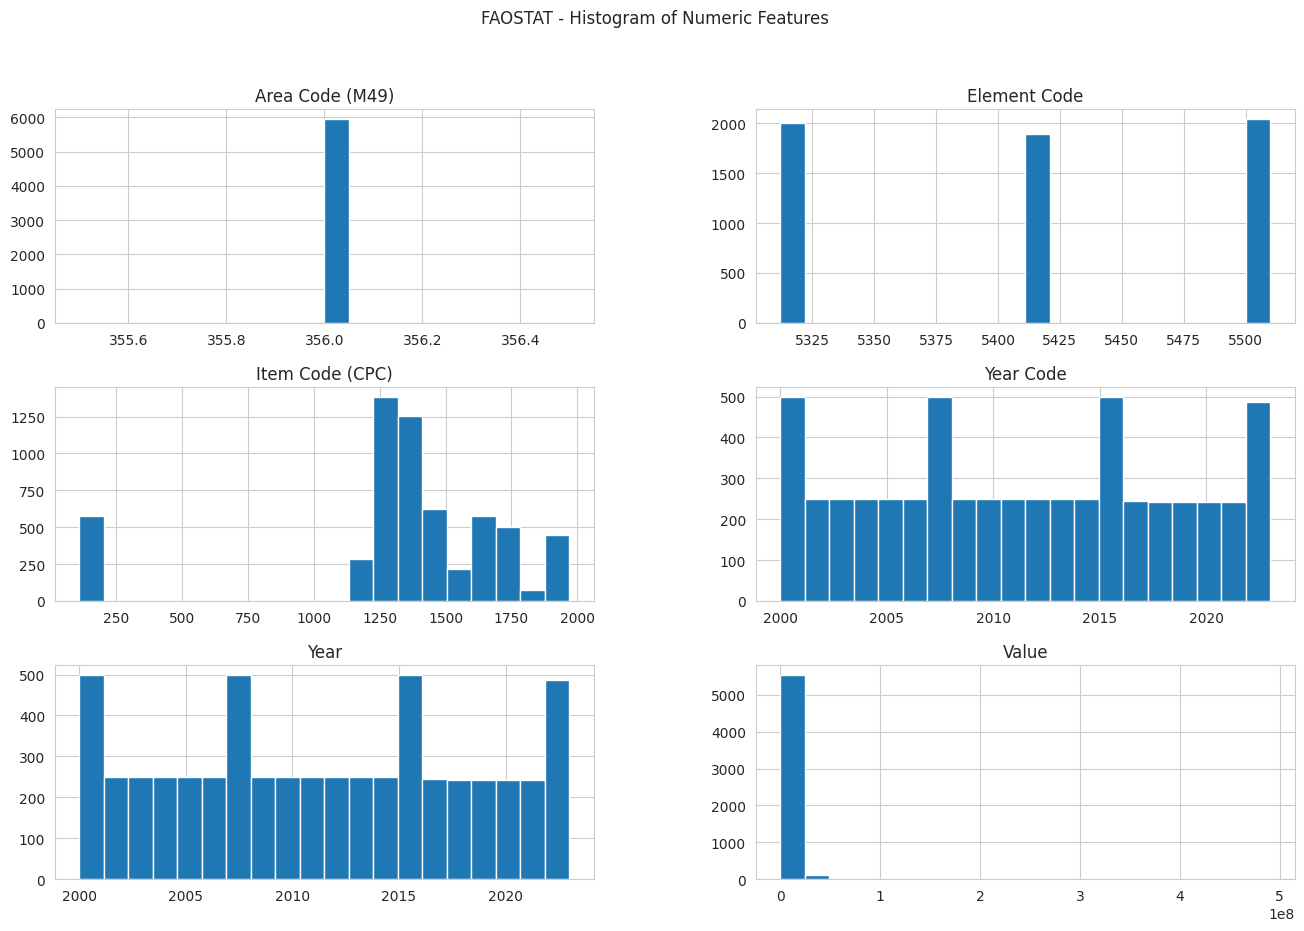

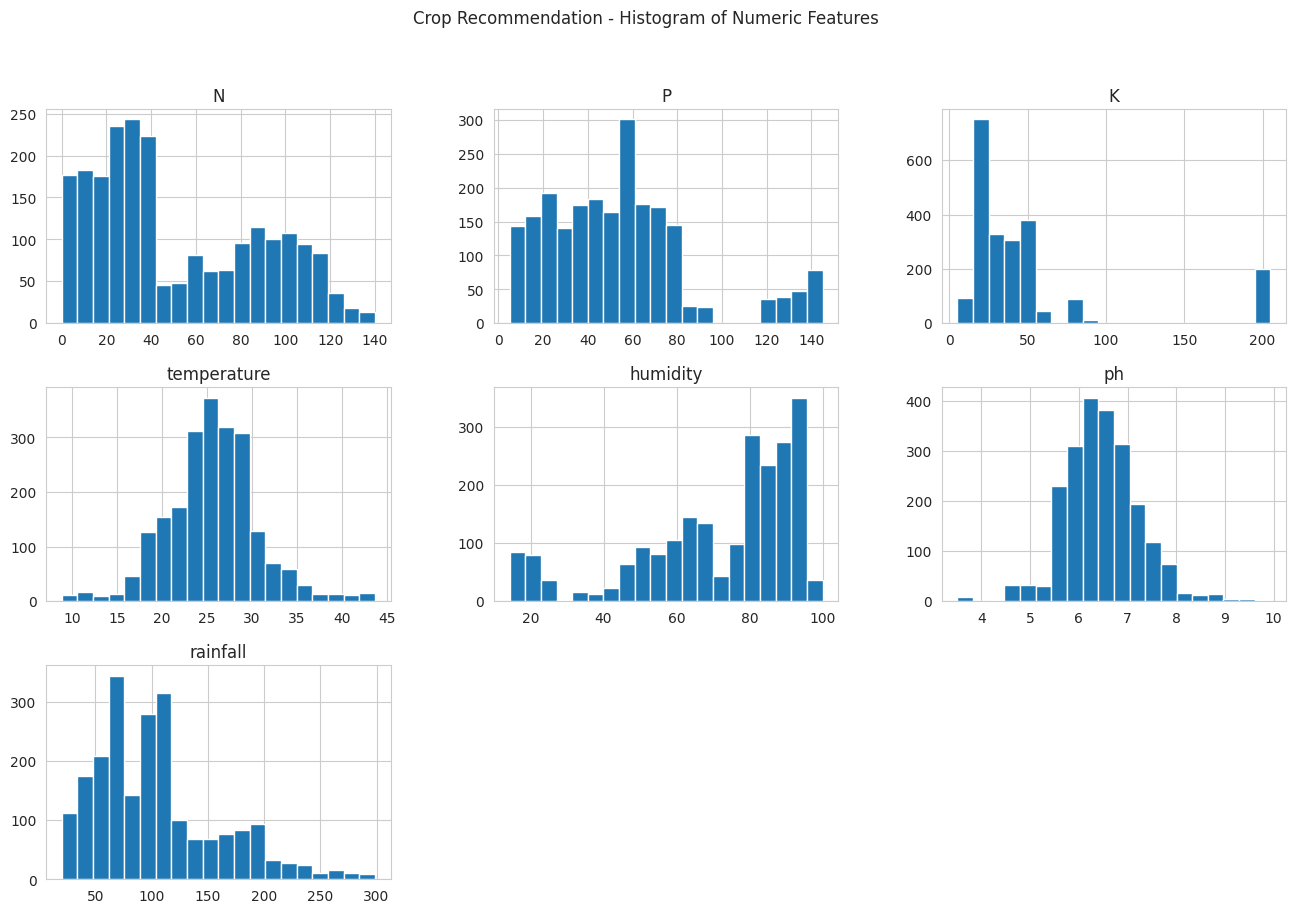

In [ ]:
# Plot histograms for FAOSTAT
faostat_df[num_cols_fao].hist(figsize=(16, 10), bins=20)
plt.suptitle("FAOSTAT - Histogram of Numeric Features")
plt.show()

# Plot histograms for Crop Recommendation dataset
crop_df[num_cols_crop].hist(figsize=(16, 10), bins=20)
plt.suptitle("Crop Recommendation - Histogram of Numeric Features")
plt.show()


**Boxplots for Outlier Detection**

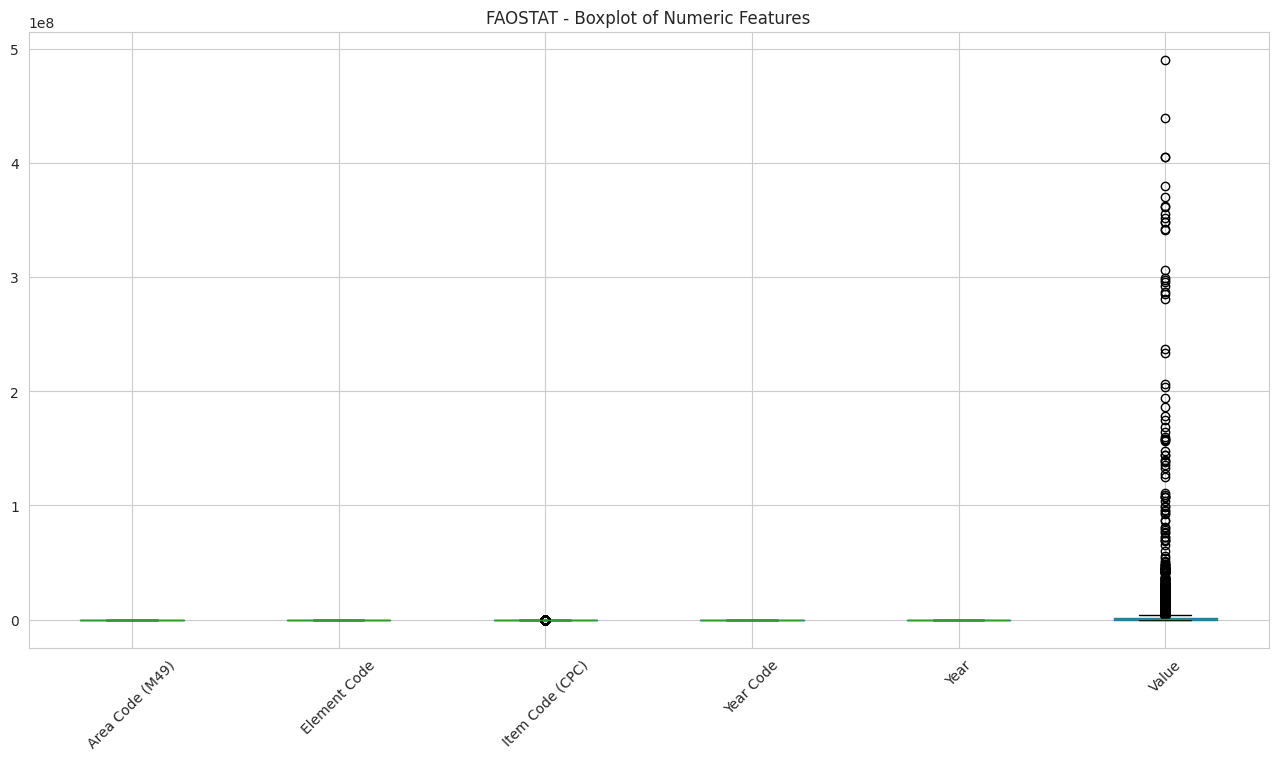

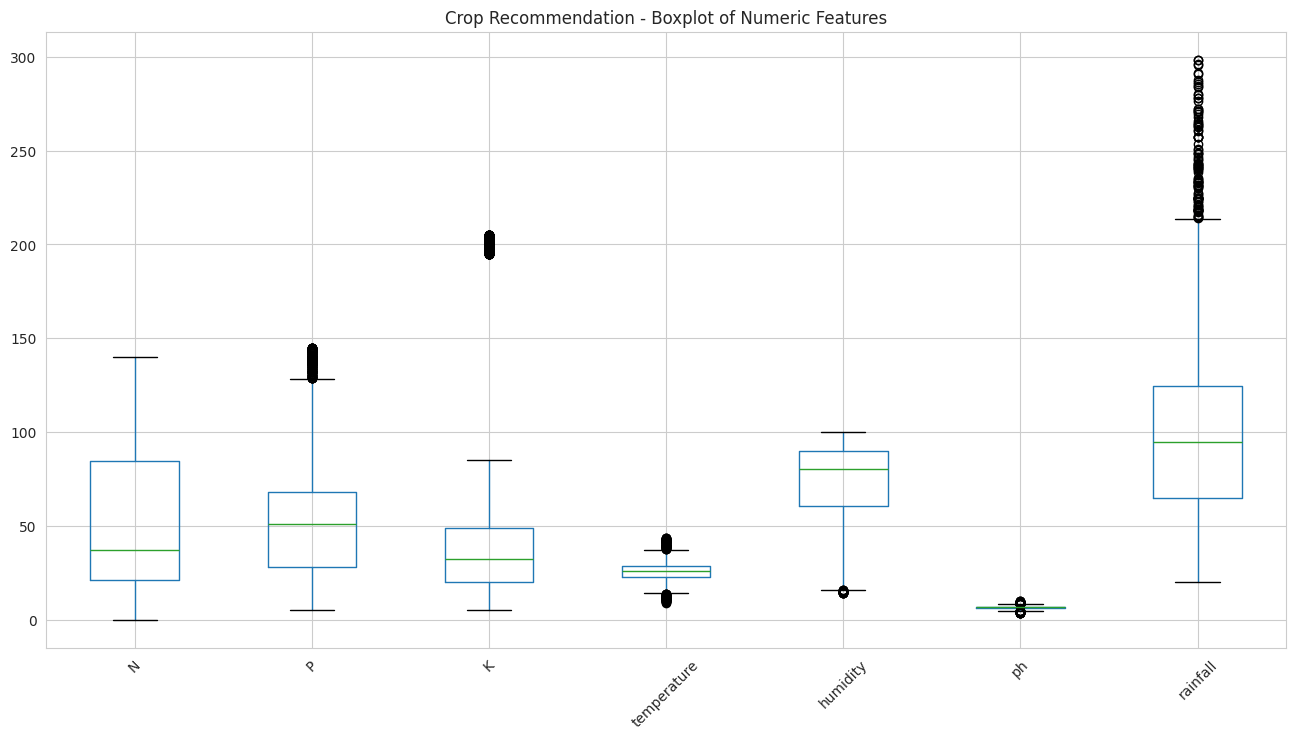

In [ ]:
# Boxplots for FAOSTAT numeric features
plt.figure(figsize=(16, 8))
faostat_df[num_cols_fao].boxplot()
plt.title("FAOSTAT - Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Boxplots for Crop Recommendation dataset
plt.figure(figsize=(16, 8))
crop_df[num_cols_crop].boxplot()
plt.title("Crop Recommendation - Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()


### **• Categorical Feature Analysis (Value Counts, Bar Charts)**


In [ ]:
cat_cols_fao = faostat_df.select_dtypes(include=['object']).columns
cat_cols_crop = crop_df.select_dtypes(include=['object']).columns

print("FAOSTAT Categorical Columns:", list(cat_cols_fao))
print("\nCrop Dataset Categorical Columns:", list(cat_cols_crop))


FAOSTAT Categorical Columns: ['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit', 'Flag', 'Flag Description', 'Note']

Crop Dataset Categorical Columns: ['label']


**Value Counts for Each Categorical Feature**

FAOSTAT Dataset

In [ ]:
for col in cat_cols_fao:
    print(f"\nValue Counts for {col}:")
    print(faostat_df[col].value_counts().head(10))  # Show top 10 categories



Value Counts for Domain Code:
Domain Code
QCL    5940
Name: count, dtype: int64

Value Counts for Domain:
Domain
Crops and livestock products    5940
Name: count, dtype: int64

Value Counts for Area:
Area
India    5940
Name: count, dtype: int64

Value Counts for Element:
Element
Production        2040
Area harvested    2007
Yield             1893
Name: count, dtype: int64

Value Counts for Item:
Item
Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    72
Apples                                                                       72
Apricots                                                                     72
Areca nuts                                                                   72
Bananas                                                                      72
Barley                                                                       72
Beans, dry                                                                   72
Cabbages                           

Crop Recommendation Dataset

In [ ]:
for col in cat_cols_crop:
    print(f"\nValue Counts for {col}:")
    print(crop_df[col].value_counts())



Value Counts for label:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


###**Bar Charts (Top 10 Categories)**

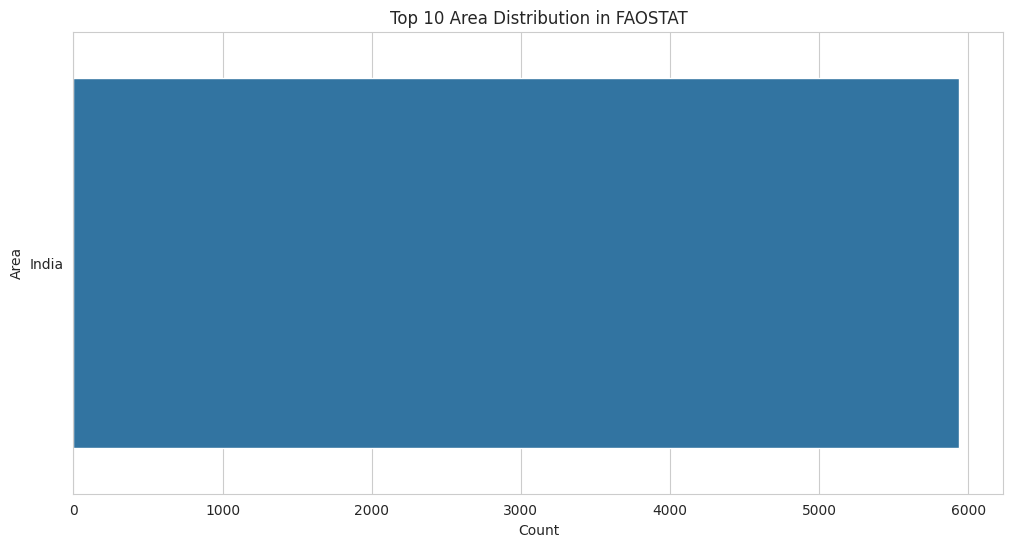

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col_to_plot = 'Area'  # Change to any categorical column you want

plt.figure(figsize=(12, 6))
sns.countplot(y=faostat_df[col_to_plot], order=faostat_df[col_to_plot].value_counts().head(10).index)
plt.title(f"Top 10 {col_to_plot} Distribution in FAOSTAT")
plt.xlabel("Count")
plt.ylabel(col_to_plot)
plt.show()


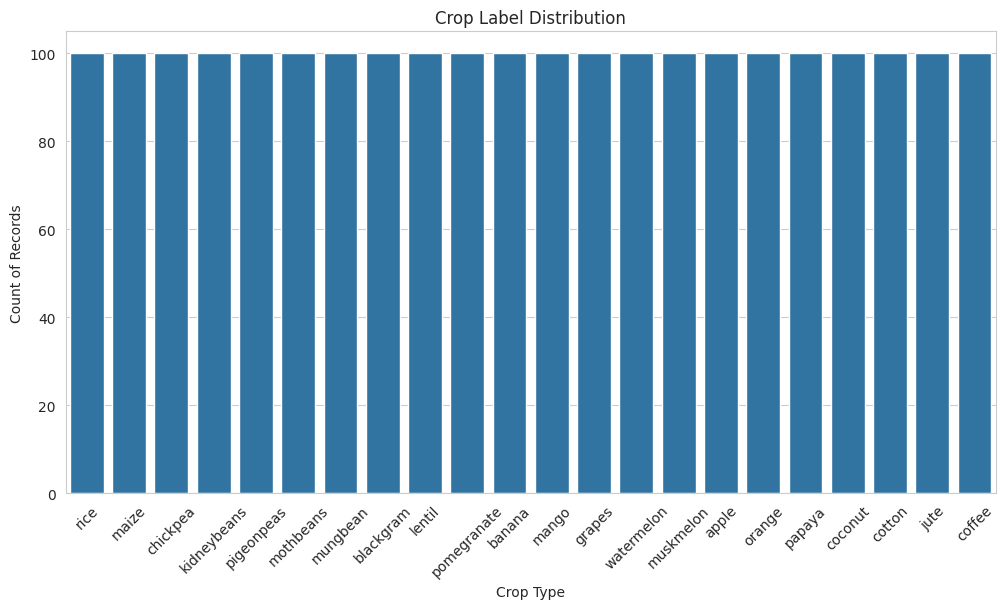

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=crop_df['label'], order=crop_df['label'].value_counts().index)
plt.title("Crop Label Distribution")
plt.xticks(rotation=45)
plt.xlabel("Crop Type")
plt.ylabel("Count of Records")
plt.show()


# **Feature vs Yield Relationship**

In [ ]:
target_col = 'Value'  # Change if needed

### **• Correlation Matrix / Heatmap**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features
num_df = faostat_df.select_dtypes(include=['int64', 'float64'])


In [ ]:
corr_matrix = num_df.corr()
corr_matrix



Area Code (M49)  Element Code  Item Code (CPC)  Year Code  \
Area Code (M49)              NaN           NaN              NaN        NaN   
Element Code                 NaN      1.000000         0.001754   0.002001   
Item Code (CPC)              NaN      0.001754         1.000000  -0.001982   
Year Code                    NaN      0.002001        -0.001982   1.000000   
Year                         NaN      0.002001        -0.001982   1.000000   
Value                        NaN      0.147587        -0.106809   0.033934   

                     Year     Value  
Area Code (M49)       NaN       NaN  
Element Code     0.002001  0.147587  
Item Code (CPC) -0.001982 -0.106809  
Year Code        1.000000  0.033934  
Year             1.000000  0.033934  
Value            0.033934  1.000000

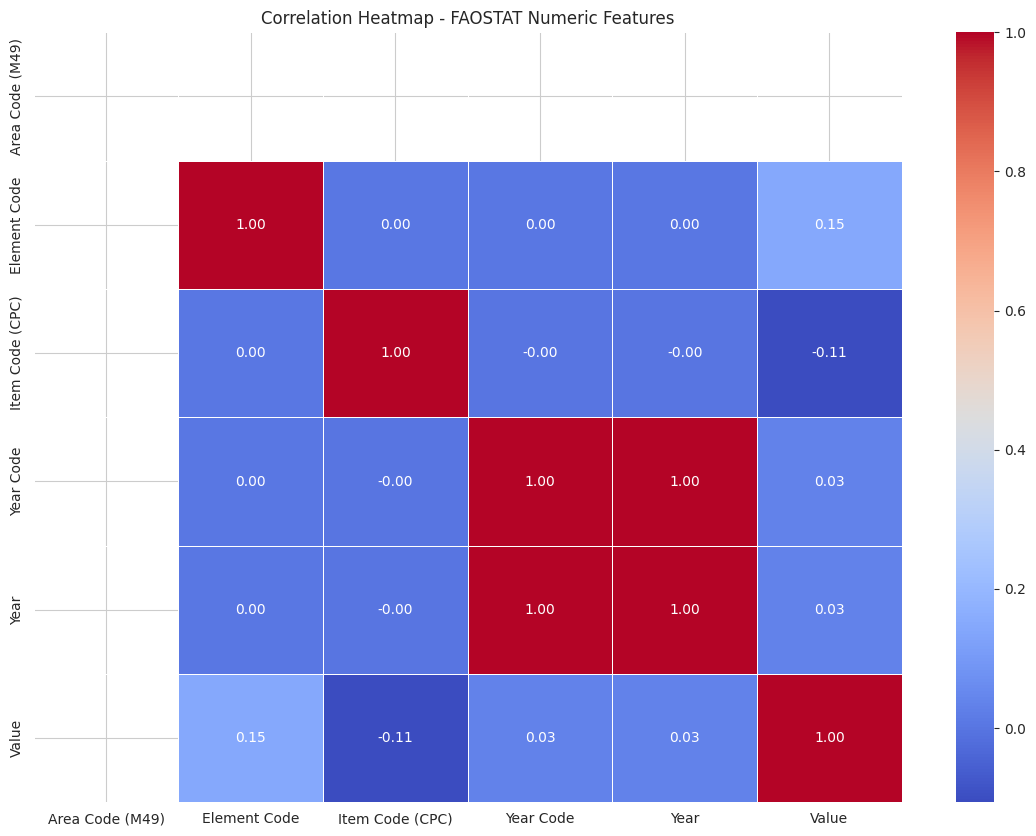

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cmap="coolwarm")
plt.title("Correlation Heatmap - FAOSTAT Numeric Features")
plt.show()



**Assuming target is Value**


In [ ]:
target = 'Value'
corr_with_yield = corr_matrix[target].sort_values(ascending=False)

print(" Correlation of Features with Yield:")
print(corr_with_yield)



 Correlation of Features with Yield:
Value              1.000000
Element Code       0.147587
Year Code          0.033934
Year               0.033934
Item Code (CPC)   -0.106809
Area Code (M49)         NaN
Name: Value, dtype: float64


###**• Scatter Plots & Boxplots**

**Scatter Plots — Numeric Feature vs Yield**

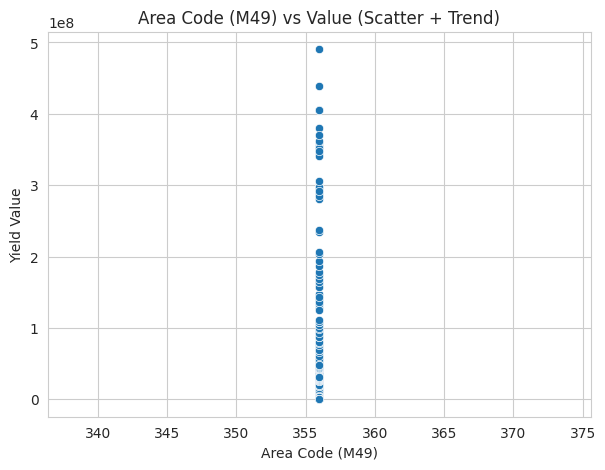

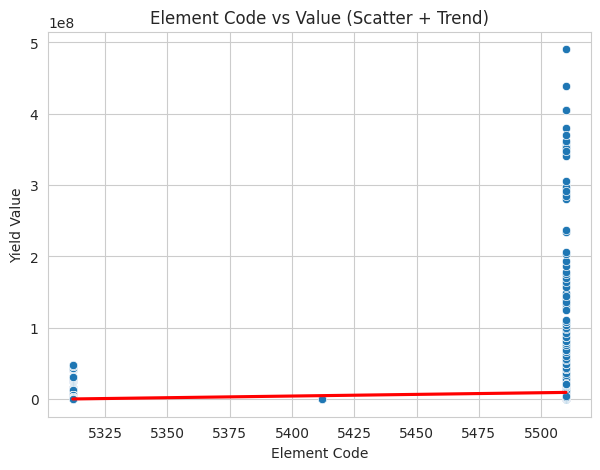

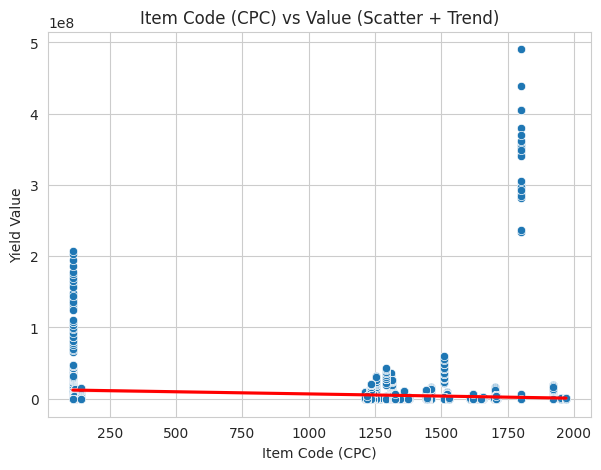

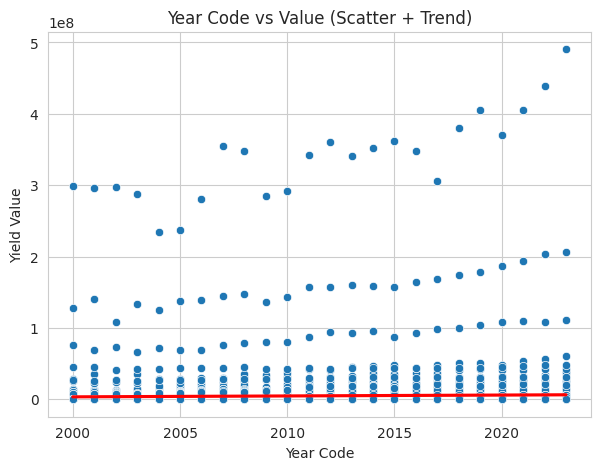

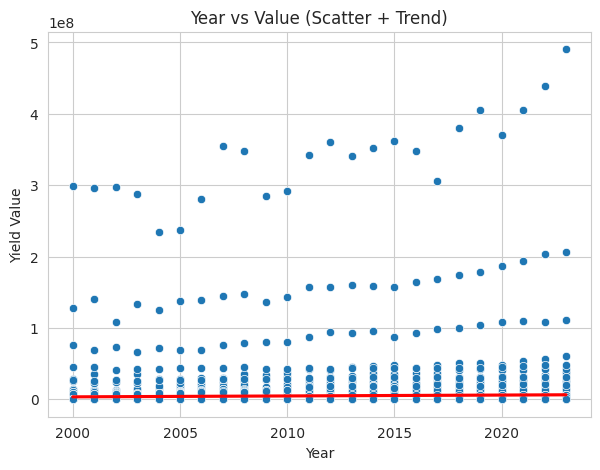

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

target_col = 'Value'  # Update if target different
num_features = faostat_df.select_dtypes(include=['float64', 'int64']).columns
num_features = [col for col in num_features if col != target_col]

for col in num_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=faostat_df, x=col, y=target_col)
    sns.regplot(data=faostat_df, x=col, y=target_col, scatter=False, color='red')
    plt.title(f"{col} vs {target_col} (Scatter + Trend)")
    plt.xlabel(col)
    plt.ylabel("Yield Value")
    plt.show()


**Boxplots — Categorical Feature vs Yield**

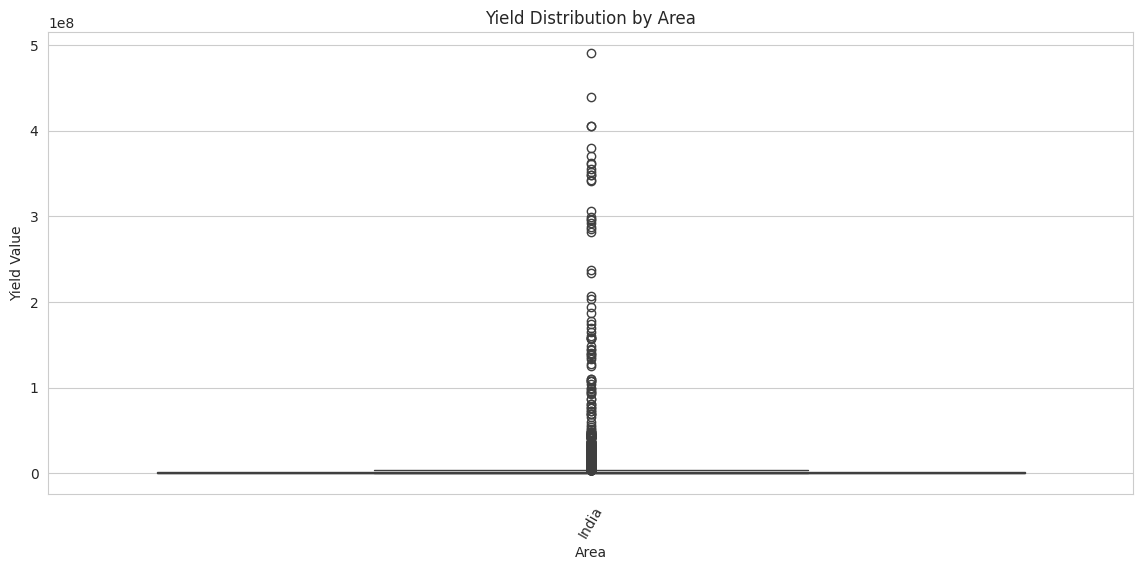

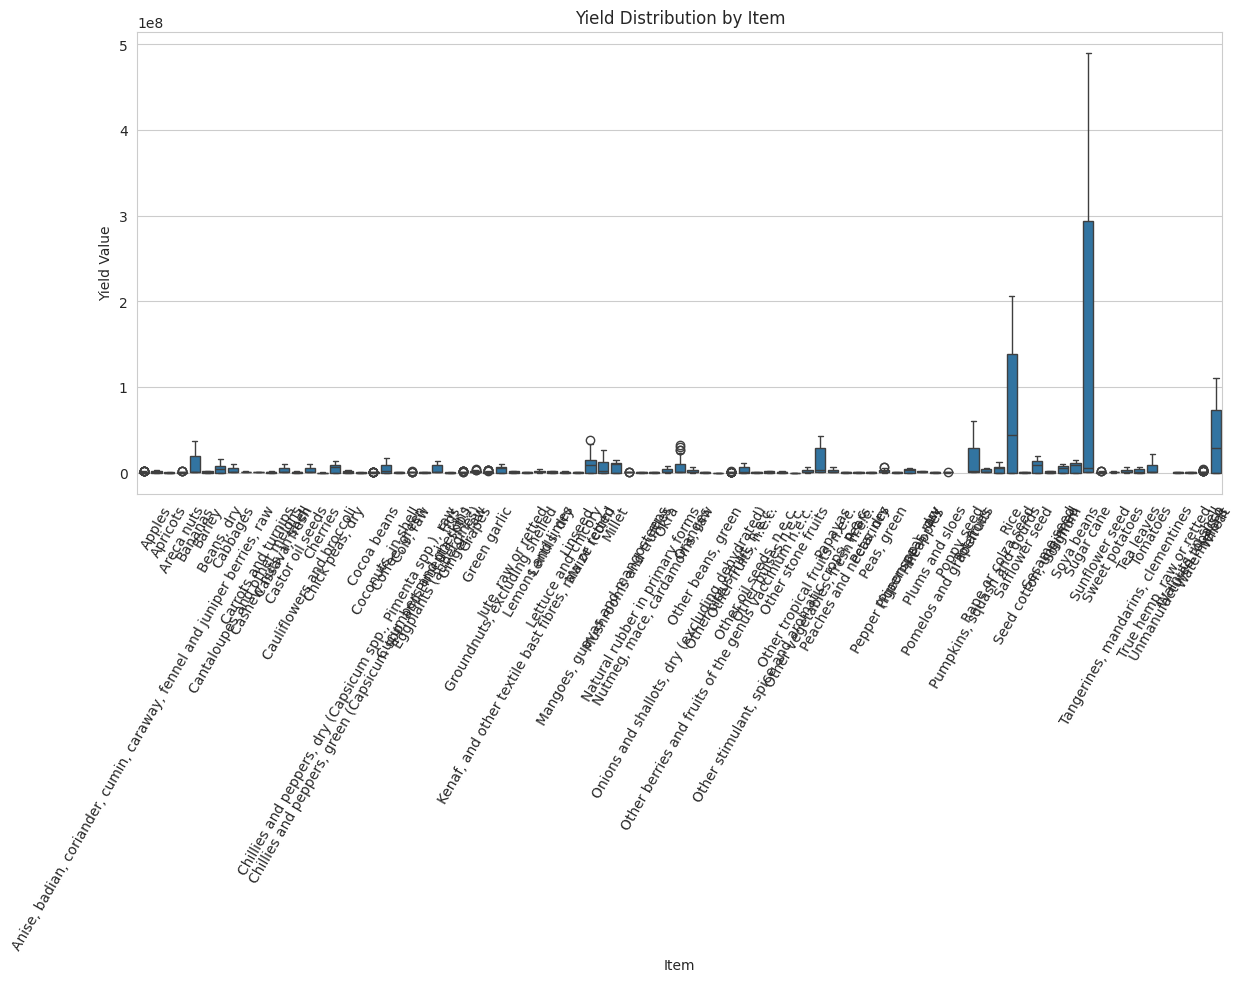

In [ ]:
cat_features = ['Area', 'Item']  # Modify based on dataset

for col in cat_features:
    if col in faostat_df.columns:
        plt.figure(figsize=(14, 6))
        sns.boxplot(data=faostat_df, x=col, y=target_col)
        plt.title(f"Yield Distribution by {col}")
        plt.xticks(rotation=60)
        plt.ylabel("Yield Value")
        plt.show()


# **Feature Importance (Preliminary Model)**

### **Select numeric features and split data**

In [ ]:
from sklearn.model_selection import train_test_split

# Select numeric columns only
num_df = faostat_df.select_dtypes(include=['int64', 'float64']).copy()

# Target variable (update if needed)
target_col = 'Value'

X = num_df.drop(columns=[target_col])
y = num_df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (4752, 5)
Testing samples: (1188, 5)


### **Train a Preliminary Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Handle NaNs in y_train and corresponding X_train before fitting
if y_train.isnull().any():
    valid_indices_train = y_train.dropna().index
    X_train_cleaned = X_train.loc[valid_indices_train]
    y_train_cleaned = y_train.loc[valid_indices_train]
    print(f"Removed {len(y_train) - len(y_train_cleaned)} NaN values from y_train for training.")
else:
    X_train_cleaned = X_train
    y_train_cleaned = y_train

rf_model.fit(X_train_cleaned, y_train_cleaned)

# Handle NaNs in y_test and corresponding X_test before scoring
if y_test.isnull().any():
    valid_indices_test = y_test.dropna().index
    X_test_cleaned = X_test.loc[valid_indices_test]
    y_test_cleaned = y_test.loc[valid_indices_test]
    print(f"Removed {len(y_test) - len(y_test_cleaned)} NaN values from y_test for scoring.")
else:
    X_test_cleaned = X_test
    y_test_cleaned = y_test

score = rf_model.score(X_test_cleaned, y_test_cleaned)
print(f"Model R² Score: {score:.3f}")

Removed 169 NaN values from y_train for training.
Removed 44 NaN values from y_test for scoring.
Model R² Score: 0.994


**Extract Feature Importance & Plot**

           Feature  Importance
1     Element Code    0.528013
2  Item Code (CPC)    0.442284
3        Year Code    0.015451
4             Year    0.014252
0  Area Code (M49)    0.000000


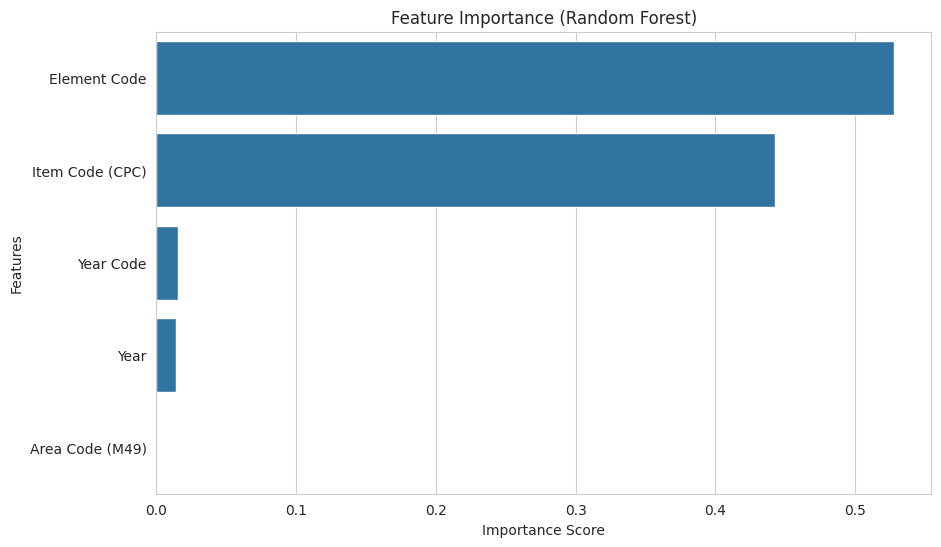

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance values
importances = rf_model.feature_importances_

# Create a dataframe
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
print(f"NaN values in y_train: {y_train.isnull().sum()}")
print(f"NaN values in y_test: {y_test.isnull().sum()}")

NaN values in y_train: 169
NaN values in y_test: 44


# **Feature Engineering**

#**Feature Engineering Plan for AgriYield Predictor**

| New Feature                    | Why it helps Yield Prediction                                         |
| ------------------------------ | --------------------------------------------------------------------- |
| **NPK Ratios** (N/P, P/K, N/K) | Fertilizer nutrient balance affects yield more than individual values |
| **Soil Richness Score**        | Aggregate impact of nutrients                                         |
| **Season-Based Indicators**    | Plant growth depends on sowing season                                 |
| **Rainfall Index**             | Drought vs excess impact                                              |
| **Temperature Stress**         | Heat-sensitive crops show sharp drops                                 |
| **Normalized Yield**           | Helps reduce variance across regions                                  |
| **Category Encodings**         | Convert `Area`, `Item` → numeric ML format                            |


**Nutrient Ratios (If N, P, K exist)**

In [ ]:
required_cols = ['N', 'P', 'K']
missing_cols = [col for col in required_cols if col not in faostat_df.columns]

if missing_cols:
    print(f"Warning: Columns {missing_cols} are missing from faostat_df. NPK ratio and soil richness features will not be created.")
else:
    faostat_df['N_P_ratio'] = faostat_df['N'] / (faostat_df['P'] + 1)
    faostat_df['P_K_ratio'] = faostat_df['P'] / (faostat_df['K'] + 1)
    faostat_df['N_K_ratio'] = faostat_df['N'] / (faostat_df['K'] + 1)

    # Soil richness score
    faostat_df['soil_richness'] = faostat_df[['N', 'P', 'K']].sum(axis=1)
    print("NPK ratio and soil richness features created successfully.")

**Rainfall-Based Features (If Rainfall available)**

In [ ]:
if 'Rainfall' in faostat_df.columns and 'Area_Harvested' in faostat_df.columns:
    faostat_df['rainfall_index'] = faostat_df['Rainfall'] / (faostat_df['Area_Harvested'] + 1)
    faostat_df['drought_flag'] = (faostat_df['Rainfall'] < 400).astype(int)  # threshold adjustable
    print("Rainfall-based features created successfully.")
elif 'Rainfall' not in faostat_df.columns:
    print("Warning: 'Rainfall' column is missing from faostat_df. Rainfall-based features will not be created.")
elif 'Area_Harvested' not in faostat_df.columns:
    print("Warning: 'Area_Harvested' column is missing from faostat_df. Rainfall-based features will not be created.")

In [ ]:
faostat_df.head()
faostat_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null   float64
 7   Item              5940 non-null   object 
 8   Year Code         5940 non-null   int64  
 9   Year              5940 non-null   int64  
 10  Unit              5940 non-null   object 
 11  Value             5727 non-null   float64
 12  Flag              5940 non-null   object 
 13  Flag Description  5940 non-null   object 
 14  Note              115 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 696.2+ KB


### **• Growing Season Index**

In [ ]:
if 'Temperature' in faostat_df.columns:
    faostat_df['temp_suitability'] = 1 / (abs(faostat_df['Temperature'] - 25) + 1)
    print("Temperature suitability feature created successfully.")
else:
    print("Warning: 'Temperature' column is missing from faostat_df. Temperature suitability feature will not be created.")

In [ ]:
# List of columns that might be missing and are needed for feature engineering
columns_to_add = ['N', 'P', 'K', 'Rainfall', 'Temperature', 'Area_Harvested']

for col in columns_to_add:
    if col not in faostat_df.columns:
        faostat_df[col] = 0  # Add the missing column with a default value of 0
        print(f"Added missing column: '{col}' to faostat_df with default value 0.")
    else:
        print(f"Column '{col}' already exists in faostat_df.")

print("\nAll specified columns are now present in faostat_df (or were already there).")
faostat_df.info()

Added missing column: 'N' to faostat_df with default value 0.
Added missing column: 'P' to faostat_df with default value 0.
Added missing column: 'K' to faostat_df with default value 0.
Added missing column: 'Rainfall' to faostat_df with default value 0.
Added missing column: 'Temperature' to faostat_df with default value 0.
Added missing column: 'Area_Harvested' to faostat_df with default value 0.

All specified columns are now present in faostat_df (or were already there).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null 

### **• Heat Stress & Rainfall Indicators**

**Binary Flag for Heat Stress**

In [ ]:
faostat_df['heat_stress'] = (faostat_df['Temperature'] > 35).astype(int)


**Heat Severity Score**

In [ ]:
faostat_df['heat_severity'] = faostat_df['Temperature'].apply(
    lambda x: x - 35 if x > 35 else 0
)


**Ideal Temperature Score**

In [ ]:
faostat_df['ideal_temp_score'] = 1 / (abs(faostat_df['Temperature'] - 25) + 1)


**Rainfall Stress Indicators**

In [ ]:
faostat_df['drought_flag'] = (faostat_df['Rainfall'] < 400).astype(int)


**Combined Climate Stress Indicator**

In [ ]:
# Define heat_stress: Assuming high temperature indicates heat stress
# Thresholds are examples and may need adjustment based on domain knowledge
faostat_df['heat_stress'] = (faostat_df['Temperature'] > 35).astype(int)

# Define excess_rain_flag: Assuming very high rainfall indicates excess rain stress
# Thresholds are examples and may need adjustment based on domain knowledge
faostat_df['excess_rain_flag'] = (faostat_df['Rainfall'] > 2000).astype(int)

faostat_df['climate_stress'] = (
    faostat_df['heat_stress'] +
    faostat_df['drought_flag'] +
    faostat_df['excess_rain_flag']
)

### **• Soil Fertility Score**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize N, P, K for fertility scoring
scaler = MinMaxScaler()
faostat_df[['N_norm', 'P_norm', 'K_norm']] = scaler.fit_transform(
    faostat_df[['N', 'P', 'K']]
)

# Balance score based on nutrient ratios
faostat_df['nutrient_balance'] = faostat_df['N'] / (faostat_df['P'] + faostat_df['K'] + 1)

# Final Soil Fertility Score
faostat_df['soil_fertility_score'] = (
    (faostat_df['N_norm'] + faostat_df['P_norm'] + faostat_df['K_norm']) / 3
) * faostat_df['nutrient_balance']


In [ ]:
faostat_df[['N','P','K','soil_fertility_score']].head()


N  P  K  soil_fertility_score
0  0  0  0                   0.0
1  0  0  0                   0.0
2  0  0  0                   0.0
3  0  0  0                   0.0
4  0  0  0                   0.0

# **Categorical Encoding Plan**

In [ ]:
cat_cols_fao  = faostat_df.select_dtypes(include=['object']).columns.tolist()
cat_cols_crop = crop_df.select_dtypes(include=['object']).columns.tolist()

print("FAOSTAT Categorical:", cat_cols_fao)
print("Crop Dataset Categorical:", cat_cols_crop)


FAOSTAT Categorical: ['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit', 'Flag', 'Flag Description', 'Note']
Crop Dataset Categorical: ['label']


**Encoding Code – Crop Dataset (crop_df)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features and target
X_crop = crop_df.drop(columns=['label'])
y_crop = crop_df['label']

# Encode target labels (crop names -> integers)
label_encoder = LabelEncoder()
y_crop_encoded = label_encoder.fit_transform(y_crop)

# Identify categorical & numeric feature columns
cat_cols_crop  = X_crop.select_dtypes(include=['object']).columns.tolist()
num_cols_crop  = X_crop.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical features (crop_df):", cat_cols_crop)
print("Numeric features (crop_df):", num_cols_crop)

# Column transformer for one-hot encoding categoricals, pass-through numerics
preprocessor_crop = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_crop),
        ('num', 'passthrough', num_cols_crop)
    ]
)

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_crop, y_crop_encoded, test_size=0.2, random_state=42
)


Categorical features (crop_df): []
Numeric features (crop_df): ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


**Encoding Code – FAOSTAT Dataset (faostat_df)**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

target_col = 'Value'  # change if your yield column is different

X_fao = faostat_df.drop(columns=[target_col])
y_fao = faostat_df[target_col]

# Identify categorical & numeric columns
cat_cols_fao = X_fao.select_dtypes(include=['object']).columns.tolist()
num_cols_fao = X_fao.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical features (faostat_df):", cat_cols_fao)
print("Numeric features (faostat_df):", num_cols_fao)

# Column transformer with One-Hot for categoricals
preprocessor_fao = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_fao),
        ('num', 'passthrough', num_cols_fao)
    ]
)

# Train-test split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_fao, y_fao, test_size=0.2, random_state=42
)


Categorical features (faostat_df): ['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit', 'Flag', 'Flag Description', 'Note']
Numeric features (faostat_df): ['Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Year', 'N', 'P', 'K', 'Rainfall', 'Temperature', 'Area_Harvested', 'heat_stress', 'heat_severity', 'ideal_temp_score', 'drought_flag', 'excess_rain_flag', 'climate_stress', 'N_norm', 'P_norm', 'K_norm', 'nutrient_balance', 'soil_fertility_score']


**Combine Preprocessor + Model (Nice & Clean)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline # Added this import

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model_crop = Pipeline(steps=[
    ('preprocess', preprocessor_crop),
    ('model', rf_clf)
])

model_crop.fit(Xc_train, yc_train)
print("Crop RF Accuracy:", model_crop.score(Xc_test, yc_test))

Crop RF Accuracy: 0.9931818181818182


# **Scaling & Preprocessing Pipeline Setup**

# **FAOSTAT: Scaling + Encoding + Regression Pipeline**

In [ ]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
# You can swap RandomForestRegressor with any other model later

# 2. Split into X (features) and y (target)
target_col = 'Value'  # change if your yield column name is different
X_fao = faostat_df.drop(columns=[target_col])
y_fao = faostat_df[target_col]

# 3. Identify categorical and numeric columns
cat_cols_fao = X_fao.select_dtypes(include=['object']).columns.tolist()
num_cols_fao = X_fao.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("FAOSTAT - Categorical columns:", cat_cols_fao)
print("FAOSTAT - Numeric columns:", num_cols_fao)

# 4. Build preprocessing transformer
preprocessor_fao = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_fao),
        ('num', StandardScaler(), num_cols_fao)
    ]
)

# 5. Choose a model (Random Forest as baseline)
regressor = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# 6. Build full pipeline: preprocessing + model
fao_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor_fao),
    ('model', regressor)
])

# 7. Train-test split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_fao, y_fao, test_size=0.2, random_state=42
)

# Handle NaNs in yf_train and corresponding Xf_train before fitting
if yf_train.isnull().any():
    valid_indices_train = yf_train.dropna().index
    Xf_train_cleaned = Xf_train.loc[valid_indices_train]
    yf_train_cleaned = yf_train.loc[valid_indices_train]
    print(f"Removed {len(yf_train) - len(yf_train_cleaned)} NaN values from yf_train for training.")
else:
    Xf_train_cleaned = Xf_train
    yf_train_cleaned = yf_train

# 8. Fit and evaluate
fao_pipeline.fit(Xf_train_cleaned, yf_train_cleaned)

# Handle NaNs in yf_test and corresponding Xf_test before scoring
if yf_test.isnull().any():
    valid_indices_test = yf_test.dropna().index
    Xf_test_cleaned = Xf_test.loc[valid_indices_test]
    yf_test_cleaned = yf_test.loc[valid_indices_test]
    print(f"Removed {len(yf_test) - len(yf_test_cleaned)} NaN values from yf_test for scoring.")
else:
    Xf_test_cleaned = Xf_test
    yf_test_cleaned = yf_test

r2_score = fao_pipeline.score(Xf_test_cleaned, yf_test_cleaned)

print(f"FAOSTAT Regression R² Score: {r2_score:.3f}")

FAOSTAT - Categorical columns: ['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit', 'Flag', 'Flag Description', 'Note']
FAOSTAT - Numeric columns: ['Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Year', 'N', 'P', 'K', 'Rainfall', 'Temperature', 'Area_Harvested', 'heat_stress', 'heat_severity', 'ideal_temp_score', 'drought_flag', 'excess_rain_flag', 'climate_stress', 'N_norm', 'P_norm', 'K_norm', 'nutrient_balance', 'soil_fertility_score']
Removed 169 NaN values from yf_train for training.
Removed 44 NaN values from yf_test for scoring.
FAOSTAT Regression R² Score: 0.994


# **Crop Recommendation: Encoding + Scaling + Classification**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 1. Split features and target
X_crop = crop_df.drop(columns=['label'])
y_crop = crop_df['label']

# 2. Encode target labels (string -> int)
label_encoder = LabelEncoder()
y_crop_encoded = label_encoder.fit_transform(y_crop)

# 3. Identify column types
cat_cols_crop = X_crop.select_dtypes(include=['object']).columns.tolist()
num_cols_crop = X_crop.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Crop - Categorical columns:", cat_cols_crop)
print("Crop - Numeric columns:", num_cols_crop)

# 4. Preprocessing for features
preprocessor_crop = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_crop),
        ('num', StandardScaler(), num_cols_crop)
    ]
)

# 5. Choose classification model
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# 6. Build full pipeline
crop_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor_crop),
    ('model', clf)
])

# 7. Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_crop, y_crop_encoded, test_size=0.2, random_state=42
)

# 8. Fit and evaluate
crop_pipeline.fit(Xc_train, yc_train)
accuracy = crop_pipeline.score(Xc_test, yc_test)

print(f"Crop Classification Accuracy: {accuracy:.3f}")


Crop - Categorical columns: []
Crop - Numeric columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Crop Classification Accuracy: 0.993


If You Want a Variant for Linear / SVM Models

# **SVM MODELS**

In [ ]:
# --- Imports ---
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# ---------- 1. Split features and target ----------
target_col = 'Value'   # change if your yield column is different
X_fao = faostat_df.drop(columns=[target_col])
y_fao = faostat_df[target_col]

# ---------- 2. Identify column types ----------
cat_cols_fao = X_fao.select_dtypes(include=['object']).columns.tolist()
num_cols_fao = X_fao.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("FAOSTAT - Categorical columns:", cat_cols_fao)
print("FAOSTAT - Numeric columns:", num_cols_fao)

# ---------- 3. Preprocessing (One-Hot + Scaling) ----------
preprocessor_fao = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_fao),
        ('num', StandardScaler(), num_cols_fao)
    ]
)

# ---------- 4. Define SVR model ----------
# RBF kernel is common for non-linear problems
svr_model = SVR(
    kernel='rbf',
    C=10.0,
    epsilon=0.1
)

# ---------- 5. Build full pipeline ----------
fao_svr_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor_fao),
    ('model', svr_model)
])

# ---------- 6. Train-test split ----------
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_fao, y_fao, test_size=0.2, random_state=42
)

# Handle NaNs in yf_train and corresponding Xf_train before fitting
if yf_train.isnull().any():
    valid_indices_train = yf_train.dropna().index
    Xf_train_cleaned = Xf_train.loc[valid_indices_train]
    yf_train_cleaned = yf_train.loc[valid_indices_train]
    print(f"Removed {len(yf_train) - len(yf_train_cleaned)} NaN values from yf_train for training.")
else:
    Xf_train_cleaned = Xf_train
    yf_train_cleaned = yf_train

# ---------- 7. Fit model ----------
fao_svr_pipeline.fit(Xf_train_cleaned, yf_train_cleaned)

# Handle NaNs in yf_test and corresponding Xf_test before evaluation
if yf_test.isnull().any():
    valid_indices_test = yf_test.dropna().index
    Xf_test_cleaned = Xf_test.loc[valid_indices_test]
    yf_test_cleaned = yf_test.loc[valid_indices_test]
    print(f"Removed {len(yf_test) - len(yf_test_cleaned)} NaN values from yf_test for scoring.")
else:
    Xf_test_cleaned = Xf_test
    yf_test_cleaned = yf_test

# ---------- 8. Evaluate ----------
y_pred = fao_svr_pipeline.predict(Xf_test_cleaned)

r2 = r2_score(yf_test_cleaned, y_pred)
mae = mean_absolute_error(yf_test_cleaned, y_pred)

print(f"SVR Yield Prediction - R² Score : {r2:.3f}")
print(f"SVR Yield Prediction - MAE      : {mae:.3f}")

FAOSTAT - Categorical columns: ['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit', 'Flag', 'Flag Description', 'Note']
FAOSTAT - Numeric columns: ['Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Year', 'N', 'P', 'K', 'Rainfall', 'Temperature', 'Area_Harvested', 'heat_stress', 'heat_severity', 'ideal_temp_score', 'drought_flag', 'excess_rain_flag', 'climate_stress', 'N_norm', 'P_norm', 'K_norm', 'nutrient_balance', 'soil_fertility_score']
Removed 169 NaN values from yf_train for training.
Removed 44 NaN values from yf_test for scoring.
SVR Yield Prediction - R² Score : -0.031
SVR Yield Prediction - MAE      : 4827499.348


In [ ]:
from sklearn.svm import SVC # Import SVC
from sklearn.pipeline import Pipeline # Import Pipeline if not already imported in this scope

# Define SVC models
svc_linear = SVC(kernel='linear', C=1.0)
svc_poly   = SVC(kernel='poly', degree=3, C=1.0)
svc_rbf    = SVC(kernel='rbf', C=1.0) # Adding an RBF kernel for common usage

# Build a new pipeline specifically for SVC using the existing preprocessor_crop
crop_svc_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor_crop),
    ('model', svc_rbf) # Start with RBF, or you can switch to svc_linear/svc_poly
])

# Train the SVC pipeline
crop_svc_pipeline.fit(Xc_train, yc_train)

# Evaluate the SVC pipeline
svc_accuracy = crop_svc_pipeline.score(Xc_test, yc_test)

print(f"Crop SVC Accuracy: {svc_accuracy:.3f}")

# If you want to try different kernels, you can set the model in the pipeline:
# crop_svc_pipeline.set_params(model=svc_linear)
# crop_svc_pipeline.fit(Xc_train, yc_train)
# svc_linear_accuracy = crop_svc_pipeline.score(Xc_test, yc_test)
# print(f"Crop SVC (Linear Kernel) Accuracy: {svc_linear_accuracy:.3f}")

Crop SVC Accuracy: 0.968


In [ ]:
svr_linear = SVR(kernel='linear', C=1.0)
fao_svr_pipeline.set_params(model=svr_linear)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Domain Code', 'Domain',
                                                   'Area', 'Element', 'Item',
                                                   'Unit', 'Flag',
                                                   'Flag Description',
                                                   'Note']),
                                                 ('num', StandardScaler(),
                                                  ['Area Code (M49)',
                                                   'Element Code',
                                                   'Item Code (CPC)',
                                                   'Year Code', 'Year', 'N',
                                                   'P', 'K', 'Rainfall',
                                                   'Temperature',
                                                   'Area_Harvested',
                                                   'heat_stress',
                                                   'heat_severity',
                                                   'ideal_temp_score',
                                                   'drought_flag',
                                                   'excess_rain_flag',
                                                   'climate_stress', 'N_norm',
                                                   'P_norm', 'K_norm',
                                                   'nutrient_balance',
                                                   'soil_fertility_score'])])),
                ('model', SVR(kernel='linear'))])

# **Milestone 3: Week 5 & 6 — Model Development & Evaluation**

# **Define Inputs & Data Pipeline**

# **Define Inputs**

**FAOSTAT Dataset → Yield Regression**

In [ ]:
target_fao = "Value"   # change if your yield column has a different name



In [ ]:
target_crop = "label"   # crop name to predict


**Load Both Datasets**

In [ ]:
import pandas as pd

# File paths (Google Colab will read from uploaded files or Drive)
FAOSTAT_FILE = "DF_1_FAOSTAT_data_en_11-19-2025.csv"
CROP_FILE    = "DF_2_Crop_recommendation.csv"

# Load datasets
faostat_df = pd.read_csv(FAOSTAT_FILE)
crop_df    = pd.read_csv(CROP_FILE)

print("FAOSTAT shape:", faostat_df.shape)
print("Crop dataset shape:", crop_df.shape)

display(faostat_df.head())
display(crop_df.head())


FAOSTAT shape: (5940, 15)
Crop dataset shape: (2200, 8)


Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)  \
0          5312  Area harvested           1654.0   
1          5412           Yield           1654.0   
2          5510      Production           1654.0   
3          5312  Area harvested           1654.0   
4          5412           Yield           1654.0   

                                                Item  Year Code  Year   Unit  \
0  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000     ha   
1  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000  kg/ha   
2  Anise, badian, coriander, cumin, caraway, fenn...       2000  2000      t   
3  Anise, badian, coriander, cumin, caraway, fenn...       2001  2001     ha   
4  Anise, badian, coriander, cumin, caraway, fenn...       2001  2001  kg/ha   

      Value Flag Flag Description Note  
0  344434.0    A  Official figure  NaN  
1     484.0    A  Official figure  NaN  
2  166692.0    A  Official figure  NaN  
3  569271.0    A  Official figure  NaN  
4     430.3    A  Official figure  NaN

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

**Basic Cleaning Function (Reusable)**

In [ ]:
def basic_cleaning(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Do basic, generic cleaning:
    - Remove duplicate rows
    - Print missing value summary
    """
    print(f"\n=== Cleaning report for {name} ===")
    print("Original shape:", df.shape)

    # Drop duplicate rows
    df = df.drop_duplicates()
    print("After dropping duplicates:", df.shape)

    # Missing values summary
    print("\nMissing values per column:")
    print(df.isnull().sum())

    return df

faostat_df = basic_cleaning(faostat_df, "FAOSTAT")
crop_df    = basic_cleaning(crop_df, "Crop Recommendation")



=== Cleaning report for FAOSTAT ===
Original shape: (5940, 15)
After dropping duplicates: (5940, 15)

Missing values per column:
Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                213
Flag                   0
Flag Description       0
Note                5825
dtype: int64

=== Cleaning report for Crop Recommendation ===
Original shape: (2200, 8)
After dropping duplicates: (2200, 8)

Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


**Define Inputs (X, y) for Both**

In [ ]:
# FAOSTAT: Yield regression
target_fao = "Value"   # change if your yield column is named differently
X_fao = faostat_df.drop(columns=[target_fao])
y_fao = faostat_df[target_fao]

# Crop dataset: Crop label classification
target_crop = "label"
X_crop = crop_df.drop(columns=[target_crop])
y_crop = crop_df[target_crop]


# **Build Preprocessing Pipelines**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify column types
cat_cols_fao = X_fao.select_dtypes(include=['object']).columns.tolist()
num_cols_fao = X_fao.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("FAOSTAT categorical:", cat_cols_fao)
print("FAOSTAT numeric:", num_cols_fao)

preprocessor_fao = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_fao),
        ('num', StandardScaler(), num_cols_fao)
    ]
)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the crop label target
label_encoder = LabelEncoder()
y_crop_encoded = label_encoder.fit_transform(y_crop)

# Identify column types
cat_cols_crop = X_crop.select_dtypes(include=['object']).columns.tolist()
num_cols_crop = X_crop.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Crop categorical:", cat_cols_crop)
print("Crop numeric:", num_cols_crop)

preprocessor_crop = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_crop),
        ('num', StandardScaler(), num_cols_crop)
    ]
)


Crop categorical: []
Crop numeric: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_crop, y_crop_encoded, test_size=0.2, random_state=42
)

svc_model = SVC(kernel='rbf', C=5.0, gamma='scale')

crop_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor_crop),
    ('model', svc_model)
])

crop_pipeline.fit(Xc_train, yc_train)

y_pred_crop = crop_pipeline.predict(Xc_test)
print("Crop SVC Accuracy:", accuracy_score(yc_test, y_pred_crop))

print("\nClassification Report:")
print(classification_report(yc_test, y_pred_crop, target_names=label_encoder.classes_))


Crop SVC Accuracy: 0.9795454545454545

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       

# **Baseline Models & Metrics**

In [ ]:
X_train, X_test, y_train, y_test

(      Area Code (M49)  Element Code  Item Code (CPC)  Year Code  Year
 2627              356          5510            118.0       2000  2000
 5036              356          5510           1444.0       2020  2020
 4684              356          5312           1235.0       2023  2023
 5431              356          5312           1324.0       2012  2012
 3874              356          5412           1345.0       2000  2000
 ...               ...           ...              ...        ...   ...
 3772              356          5412           1290.9       2014  2014
 5191              356          5412           1802.0       2000  2000
 5226              356          5312           1802.0       2012  2012
 5390              356          5510           1530.0       2018  2018
 860               356          5510           1447.0       2000  2000
 
 [4752 rows x 5 columns],
       Area Code (M49)  Element Code  Item Code (CPC)  Year Code  Year
 5795              356          5510          137

# **Model Evaluation Function**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    """
    Train the given regression model and print evaluation metrics.
    This keeps code clean and reusable for many models.
    """
    # 1. Train the model on training data
    model.fit(X_train, y_train)

    # 2. Predict on test data
    y_pred = model.predict(X_test)

    # 3. Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # 4. Print results in a clean format
    print(f"Model Name   : {model.__class__.__name__}")
    print(f"MAE          : {mae:.4f}")
    print(f"MSE          : {mse:.4f}")
    print(f"RMSE         : {rmse:.4f}")
    print(f"R² Score     : {r2:.4f}")
    print("-" * 50)

    # 5. Return metrics if you want to store later
    return {
        "model_name": model.__class__.__name__,
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "r2": r2
    }


### **• Dummy Regressor**

In [ ]:
# Dummy Regressor Baseline

from sklearn.dummy import DummyRegressor

def run_dummy_regressor_baseline(X_train, X_test, y_train, y_test):
    """
    Build a very simple baseline model using DummyRegressor.
    This will predict the mean of the target variable.
    """
    print("Running Dummy Regressor (Baseline)...")

    # Handle NaN values in y_train and y_test by imputing with the mean
    # This is necessary because scikit-learn models do not handle NaNs by default.
    y_train_cleaned = y_train.fillna(y_train.mean())
    y_test_cleaned = y_test.fillna(y_test.mean())

    # strategy="mean" -> always predict the mean of y_train
    dummy_model = DummyRegressor(strategy="mean")

    # Use the common evaluation function
    metrics = evaluate_regression_model(
        model=dummy_model,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train_cleaned, # Use cleaned y_train
        y_test=y_test_cleaned    # Use cleaned y_test
    )

    return dummy_model, metrics

dummy_model, dummy_metrics = run_dummy_regressor_baseline(
    X_train, X_test, y_train, y_test
)


Running Dummy Regressor (Baseline)...
Model Name   : DummyRegressor
MAE          : 7053499.6103
MSE          : 668573272757199.2500
RMSE         : 25856783.8827
R² Score     : -0.0000
--------------------------------------------------


### **• Linear Regression**

In [ ]:
# Linear Regression  model
from sklearn.linear_model import LinearRegression

def run_linear_regression(X_train, X_test, y_train, y_test):
    """
    Build and evaluate a Linear Regression model.
    """
    print("Running Linear Regression Model...")

    # Handle NaN values in y_train and y_test by imputing with the mean
    # This is necessary because scikit-learn models do not handle NaNs by default.
    y_train_cleaned = y_train.fillna(y_train.mean())
    y_test_cleaned = y_test.fillna(y_test.mean())

    linear_model = LinearRegression()

    # Use the common evaluation function
    metrics = evaluate_regression_model(
        model=linear_model,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train_cleaned, # Use cleaned y_train
        y_test=y_test_cleaned    # Use cleaned y_test
    )

    return linear_model, metrics

linear_model, linear_metrics = run_linear_regression(
    X_train, X_test, y_train, y_test
)

Running Linear Regression Model...
Model Name   : LinearRegression
MAE          : 7285777.4052
MSE          : 653222319854838.8750
RMSE         : 25558214.3323
R² Score     : 0.0229
--------------------------------------------------


# **Train Main Models**

### **• Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def run_random_forest_regressor(X_train, X_test, y_train, y_test):
    """
    Build and evaluate a Random Forest Regressor model.
    """
    print("Running Random Forest Regressor Model...")

    # Handle NaN values in y_train and y_test by imputing with the mean
    # This is necessary because scikit-learn models do not handle NaNs by default.
    y_train_cleaned = y_train.fillna(y_train.mean())
    y_test_cleaned = y_test.fillna(y_test.mean())

    # Initialize Random Forest Regressor with default parameters for now
    # Hyperparameter tuning can be done later.
    rf_model = RandomForestRegressor(random_state=42)

    # Use the common evaluation function
    metrics = evaluate_regression_model(
        model=rf_model,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train_cleaned, # Use cleaned y_train
        y_test=y_test_cleaned    # Use cleaned y_test
    )

    return rf_model, metrics

random_forest_model, random_forest_metrics = run_random_forest_regressor(
    X_train, X_test, y_train, y_test
)

Running Random Forest Regressor Model...
Model Name   : RandomForestRegressor
MAE          : 344316.5708
MSE          : 3914496094463.6328
RMSE         : 1978508.5530
R² Score     : 0.9941
--------------------------------------------------


Top 10 Feature Importances for Random Forest Regressor:


Feature  Importance
1     Element Code    0.525168
2  Item Code (CPC)    0.443575
4             Year    0.016298
3        Year Code    0.014959
0  Area Code (M49)    0.000000

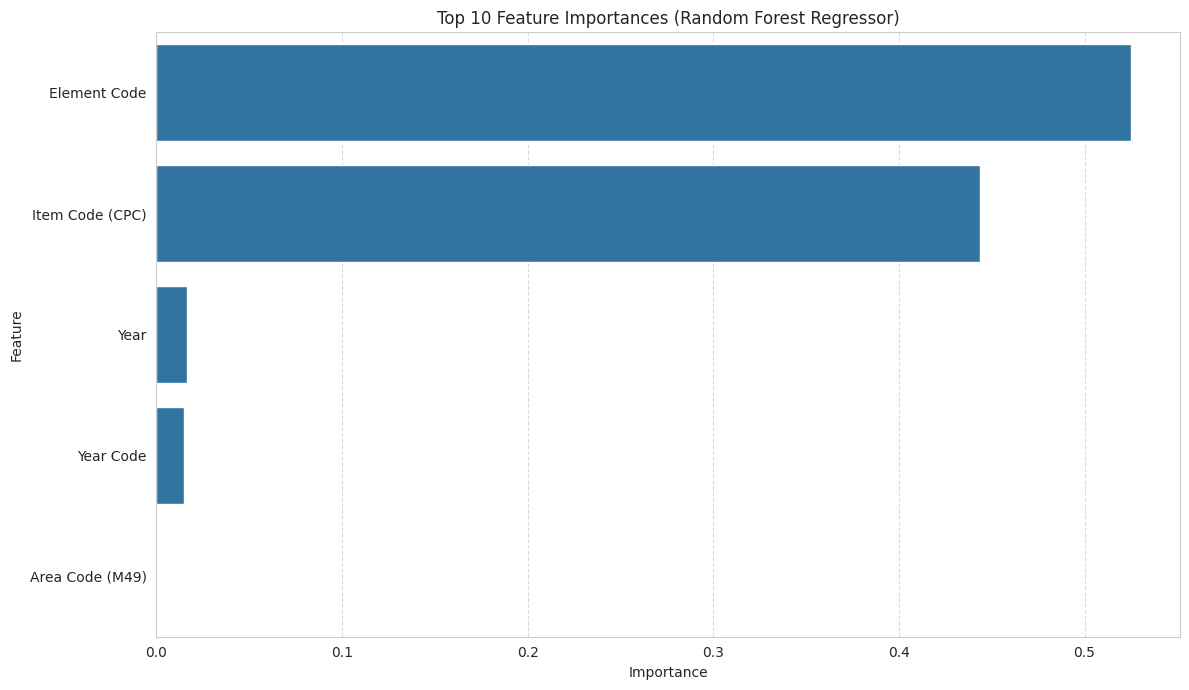

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
feature_importances = random_forest_model.feature_importances_

# Get feature names from X_train (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame for better visualization and sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features (e.g., top 10)
num_features_to_display = 10
print(f"Top {num_features_to_display} Feature Importances for Random Forest Regressor:")
display(importance_df.head(num_features_to_display))

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(num_features_to_display))
plt.title(f'Top {num_features_to_display} Feature Importances (Random Forest Regressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **• XGBoost Regressor**

In [ ]:
!pip install xgboost


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    """
    Train the given regression model and print evaluation metrics.
    Works for DummyRegressor, LinearRegression, XGBoost, etc.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model Name   : {model.__class__.__name__}")
    print(f"MAE          : {mae:.4f}")
    print(f"MSE          : {mse:.4f}")
    print(f"RMSE         : {rmse:.4f}")
    print(f"R² Score     : {r2:.4f}")
    print("-" * 50)

    return {
        "model_name": model.__class__.__name__,
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "r2": r2
    }


Top 10 Feature Importances for Tuned XGBoost Regressor:


Feature  Importance
1     Element Code    0.731985
2  Item Code (CPC)    0.256299
3        Year Code    0.011716
0  Area Code (M49)    0.000000
4             Year    0.000000

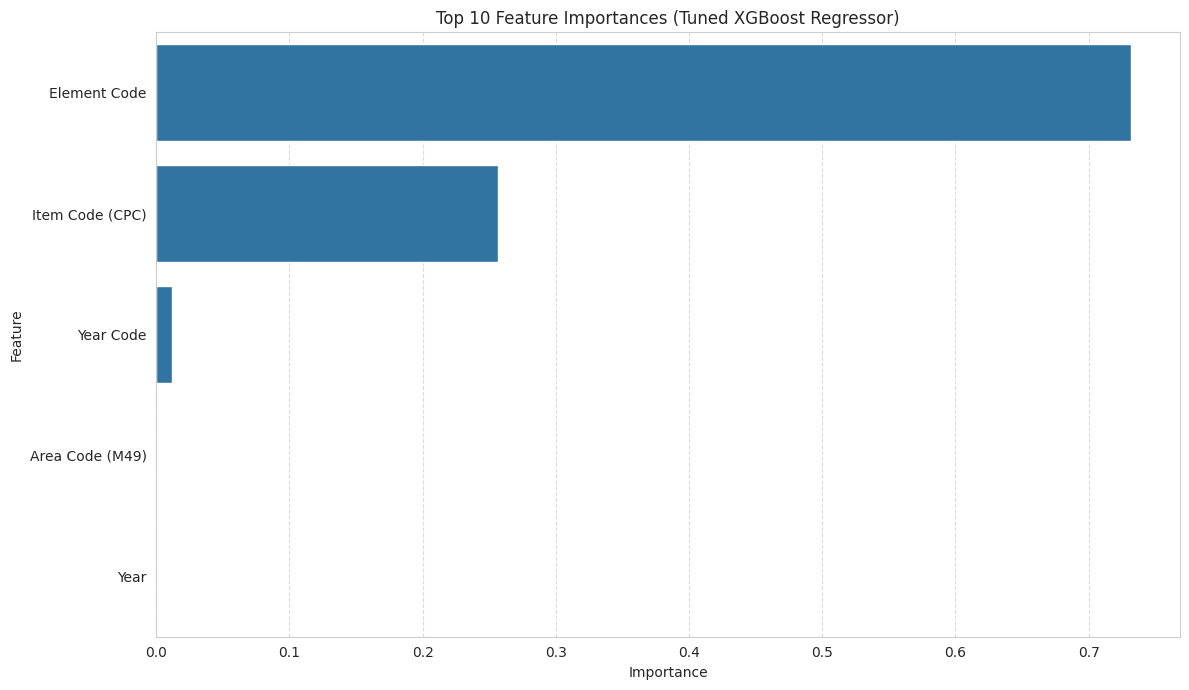

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best trained XGBoost model
# The best_model is available from the RandomizedSearchCV cell
feature_importances_xgb = best_model.feature_importances_

# Get feature names from X_train (assuming X_train is a DataFrame)
feature_names_xgb = X_train.columns

# Create a DataFrame for better visualization and sorting
importance_df_xgb = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': feature_importances_xgb
})

# Sort features by importance in descending order
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Display the top N most important features (e.g., top 10)
num_features_to_display_xgb = 10
print(f"Top {num_features_to_display_xgb} Feature Importances for Tuned XGBoost Regressor:")
display(importance_df_xgb.head(num_features_to_display_xgb))

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb.head(num_features_to_display_xgb))
plt.title(f'Top {num_features_to_display_xgb} Feature Importances (Tuned XGBoost Regressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Model Hyperparameter Tuning**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define base model
model = XGBRegressor(objective="reg:squarederror", random_state=42)

# Hyperparameter grid (simple)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Random Search CV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,           # Try 10 random combinations
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Handle NaN values in y_train and y_test by imputing with the mean
# This is necessary because scikit-learn models do not handle NaNs by default in the target variable.
y_train_cleaned = y_train.fillna(y_train.mean())
y_test_cleaned = y_test.fillna(y_test.mean())

# Fit on training data with cleaned y_train
random_search.fit(X_train, y_train_cleaned)

# Best model
best_model = random_search.best_estimator_

# Predict with best model using cleaned y_test for evaluation
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test_cleaned, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_cleaned, y_pred))
r2 = r2_score(y_test_cleaned, y_pred)

print("\nBest Hyperparameters:", random_search.best_params_)
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
MAE: 431887.941
RMSE: 2090739.923
R² Score: 0.993


#**Evaluate on Test Data**

### **• RMSE, MAE, R² Comparison Table**

# **Model Interpretation**

### **• Feature Importance**

### **• SHAP Analysis**

# **Select and Save Best Model**

# **Milestone 4: UI for Predictions**

## **Build Prediction Web App (Streamlit)**

## **Model Loading & Input Form**

## **User Prediction & Display Results**

# **Milestone 5 — Final Deployment & Report**

## **Deployment (Render / Local Demo)**

## **Documentation & Future Enhancements**

# **📎 Appendices**

**A. About the Dataset**

**B. Glossary of Features**

**C. References & CitationsEnhancements**